# image loading

In [1]:
import os
from PIL import Image
import numpy as np

def load_data(directory, target_size=(128, 128)):  # You can adjust the target size as needed
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            # Resize the image to a fixed size
            image = image.resize(target_size)
            images.append(np.array(image))
            labels.append(class_name)
    return np.array(images), np.array(labels)

train_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\train"
test_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\test"


train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (1165, 128, 128, 3)
Train labels shape: (1165,)
Test images shape: (301, 128, 128, 3)
Test labels shape: (301,)


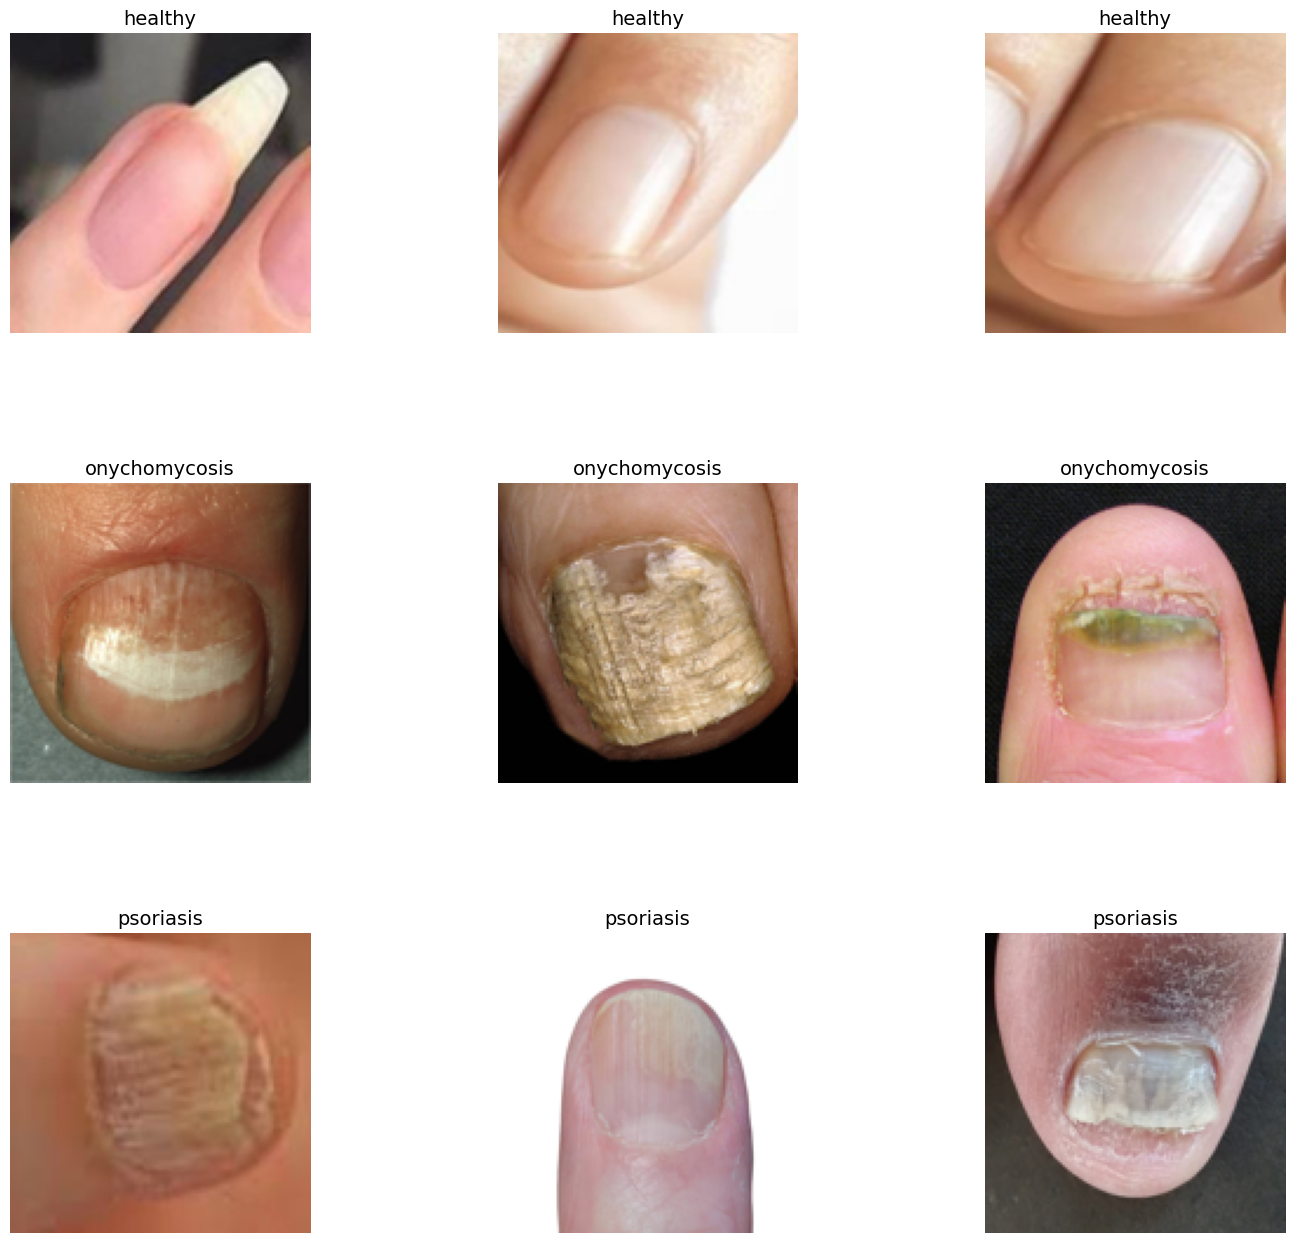

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from PIL import Image

def plot_sample_images(image_array, label_array, class_names, samples_per_class=3):
    fig, axes = plt.subplots(len(class_names), samples_per_class, figsize=(5 * samples_per_class, 5 * len(class_names)))
    for i, class_name in enumerate(class_names):
        indexes = [idx for idx, label in enumerate(label_array) if label == class_name][:samples_per_class]
        for j, index in enumerate(indexes):
            img = image_array[index]
            if img.dtype != np.uint8:
                img = (255 * img).astype(np.uint8)
            if img.ndim == 2:  
                img = np.stack((img,) * 3, axis=-1)
            elif img.shape[2] == 4:  
                img = img[..., :3]
            axes[i, j].imshow(img)
            axes[i, j].set_title(class_name, fontsize=14)
            axes[i, j].axis('off')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1, hspace=0.5, wspace=0.3)
    plt.show()

train_images, train_labels = load_data(train_dir)  
class_names = sorted(set(train_labels)) 
plot_sample_images(train_images, train_labels, class_names)


# eda


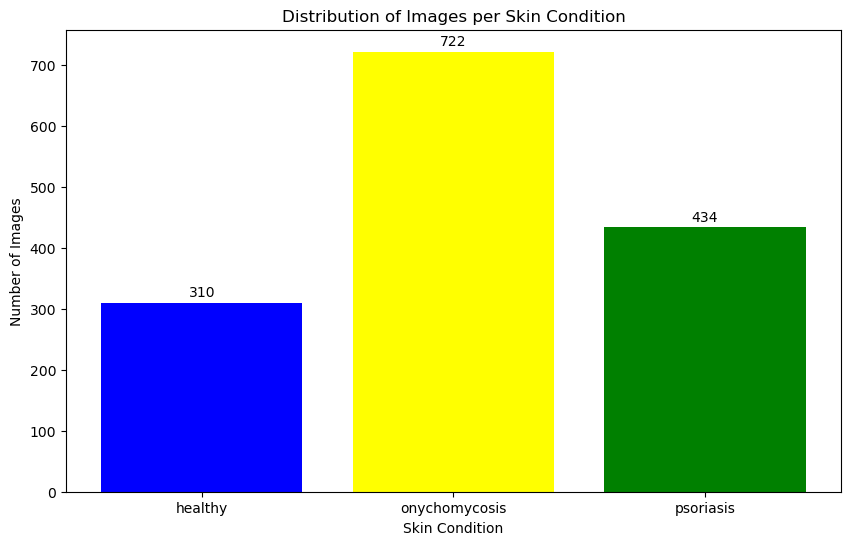

In [3]:
all_labels = np.concatenate([train_labels, test_labels])

unique_classes, counts = np.unique(all_labels, return_counts=True)

plt.figure(figsize=(10, 6))
bars = plt.bar(unique_classes, counts, color=['blue', 'yellow', 'green', 'red'])
plt.xlabel('Skin Condition')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Skin Condition')

for bar, count in zip(bars, counts):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, count, ha='center', va='bottom')

plt.show()

# image resizing

In [4]:
from PIL import Image
import numpy as np
import os

def resize_images(directory, target_size=(128, 128)):
    resized_images = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            pil_image = Image.open(image_path)
            resized_image = pil_image.resize(target_size)
            resized_images.append(np.array(resized_image))
    return np.array(resized_images)


train_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\train"


resized_train_images = resize_images(train_dir)

print("Resized train images shape:", resized_train_images.shape)



resized_train_images

Resized train images shape: (1165, 128, 128, 3)


array([[[[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 37,  35,  38],
         [ 39,  37,  40],
         [ 40,  38,  41]],

        [[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 37,  35,  38],
         [ 39,  37,  40],
         [ 40,  38,  41]],

        [[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 39,  37,  40],
         [ 41,  39,  42],
         [ 41,  39,  42]],

        ...,

        [[235, 172, 154],
         [236, 173, 155],
         [236, 173, 155],
         ...,
         [254, 198, 181],
         [252, 196, 179],
         [249, 192, 175]],

        [[233, 170, 152],
         [235, 172, 154],
         [237, 174, 156],
         ...,
         [254, 197, 180],
         [253, 196, 179],
         [250, 193, 176]],

        [[231, 168, 150],
         [234, 171, 153],
         [237, 174, 156],
         ...,
         [251, 194, 177],
        

# image normalising

In [5]:
def normalize_images(image_list):
    normalized_images = []
    for image in image_list:
        normalized_image = image.astype('float32') / 255.0
        normalized_images.append(normalized_image)
    return np.array(normalized_images)

normalized_train_images = normalize_images(resized_train_images)

print("Normalized train images shape:", normalized_train_images.shape)


normalized_train_images

Normalized train images shape: (1165, 128, 128, 3)


array([[[[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.14509805, 0.13725491, 0.14901961],
         [0.15294118, 0.14509805, 0.15686275],
         [0.15686275, 0.14901961, 0.16078432]],

        [[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.14509805, 0.13725491, 0.14901961],
         [0.15294118, 0.14509805, 0.15686275],
         [0.15686275, 0.14901961, 0.16078432]],

        [[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.15294118, 0.14509805, 0.15686275],
         [0.16078432, 0.15294118, 0.16470589],
         [0.16078432, 0.15294118, 0.16470589]],

        ...,

        [[0.92156863, 0.6745098 , 0.6039216 ],
         [0.9254902 , 0.6784314 , 0.60784316]

# resizing and normalising test images

In [6]:
resized_test_images = resize_images(test_dir)
print("Resized test images shape:", resized_test_images.shape)


normalized_test_images = normalize_images(resized_test_images)
print("Normalized test images shape:", normalized_test_images.shape)


Resized test images shape: (301, 128, 128, 3)
Normalized test images shape: (301, 128, 128, 3)


# histogram

In [8]:
from PIL import Image, ImageOps
import numpy as np

def equalize_images(image_array):
    equalized_images = []
    for img in image_array:
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        equalized_img = ImageOps.equalize(pil_img)
        equalized_images.append(np.array(equalized_img) / 255.0)
    return np.array(equalized_images)

filtered_train_images = equalize_images(normalized_train_images)
filtered_test_images = equalize_images(normalized_test_images)

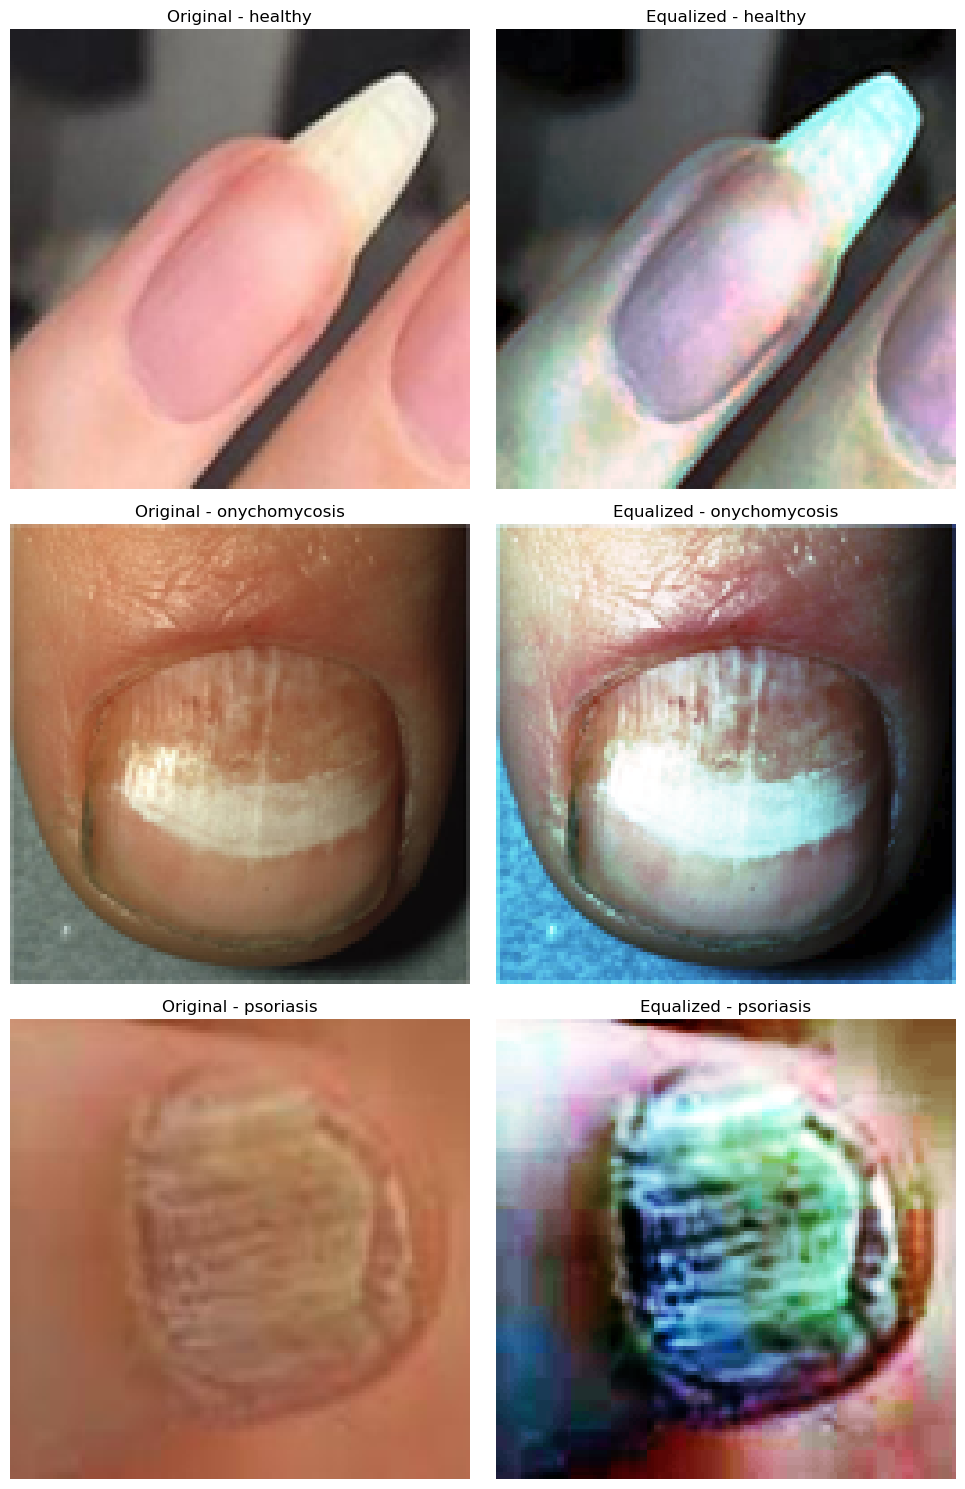

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_per_category(original_images, equalized_images, labels, class_names, num_images_per_class=1):
    fig, axes = plt.subplots(len(class_names), 2, figsize=(10, 15))
    
    for i, class_name in enumerate(class_names):
        class_indexes = np.where(labels == class_name)[0]
        for j in range(num_images_per_class):
            sample_index = class_indexes[j]  
            axes[i, 0].imshow(original_images[sample_index])
            axes[i, 0].set_title("Original - " + class_name)
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(equalized_images[sample_index])
            axes[i, 1].set_title("Equalized - " + class_name)
            axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_images_per_category(normalized_train_images, filtered_train_images, train_labels, class_names, num_images_per_class=1)


# label encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_train_labels = le.fit_transform(train_labels)
encoded_test_labels = le.transform(test_labels)

print("Encoded train  labels:", encoded_train_labels)
print("Label classes:", le.classes_)


Encoded train labels: [0 0 0 ... 2 2 2]
Label classes: ['healthy' 'onychomycosis' 'psoriasis']


# data augmentation

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    filtered_train_images, 
    encoded_train_labels, 
    batch_size=32
)

test_generator = test_datagen.flow(
    filtered_test_images,  
    encoded_test_labels, 
    batch_size=32,
    shuffle=False  
)


# cnn model from scratch

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
import tensorflow as tf
import random

# Seed value
seed_value = 9557

os.environ['PYTHONHASHSEED'] = str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    
    Flatten(),
    
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    
    Dense(3, activation='softmax')
])
#compiling model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)     

In [13]:
#training
history = model.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,  
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32  
)

Epoch 1/10


36/36 [==============================] - 7s 160ms/step - loss: 1.0273 - accuracy: 0.4907 - val_loss: 1.0843 - val_accuracy: 0.4722
Epoch 2/10
36/36 [==============================] - 6s 157ms/step - loss: 0.9433 - accuracy: 0.5375 - val_loss: 0.9489 - val_accuracy: 0.5590
Epoch 3/10
36/36 [==============================] - 6s 167ms/step - loss: 0.8061 - accuracy: 0.5896 - val_loss: 1.2093 - val_accuracy: 0.5590
Epoch 4/10
36/36 [==============================] - 6s 157ms/step - loss: 0.7900 - accuracy: 0.6222 - val_loss: 0.7602 - val_accuracy: 0.6771
Epoch 5/10
36/36 [==============================] - 6s 153ms/step - loss: 0.7847 - accuracy: 0.6108 - val_loss: 0.7360 - val_accuracy: 0.6632
Epoch 6/10
36/36 [==============================] - 6s 153ms/step - loss: 0.7576 - accuracy: 0.6258 - val_loss: 0.6556 - val_accuracy: 0.7431
Epoch 7/10
36/36 [==============================] - 5s 149ms/step - loss: 0.6913 - accuracy: 0.6752 - val_loss: 0.7848 - val_accuracy: 0.5312
Epoc

In [143]:
from sklearn.metrics import confusion_matrix, classification_report

test_loss_custom, test_accuracy_custom = model.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning:", test_loss_custom)
print("Test Accuracy after Fine-Tuning:", test_accuracy_custom)

test_predictions_custom = model.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_custom = np.argmax(test_predictions_custom, axis=1)

#confusion matrix and classification report
conf_matrix_custom = confusion_matrix(encoded_test_labels[:len(test_predictions_custom)], test_predictions_custom)
class_report_custom = classification_report(encoded_test_labels[:len(test_predictions_custom)], test_predictions_custom, target_names=le.classes_)
print("Confusion Matrix for custom CNN")
print(conf_matrix_custom)
print("Classification Report for custom CNN")
print(class_report_custom)

from sklearn.metrics import cohen_kappa_score

tp = np.diag(conf_matrix_custom)
fp = np.sum(conf_matrix_custom, axis=0) - tp
fn = np.sum(conf_matrix_custom, axis=1) - tp
tn = conf_matrix_custom.sum() - (tp + fp + fn)

#Sensitivity (Recall)
overall_sensitivity = np.sum(tp) / np.sum(tp + fn)
print("Sensitivity for CNN model:", overall_sensitivity)

#Specificity
overall_specificity = np.sum(tn) / np.sum(tn + fp)
print("Specificity for CNN model:", overall_specificity)

#Cohen's Kappa
overall_kappa = cohen_kappa_score(encoded_test_labels[:len(test_predictions_custom)], test_predictions_custom)
print("Cohen's Kappa for CNN model:", overall_kappa)



9/9 [==============================] - 1s 49ms/step - loss: 0.5887 - accuracy: 0.7326
Test Loss after Fine-Tuning: 0.5886995792388916
Test Accuracy after Fine-Tuning: 0.7326388955116272
9/9 [==============================] - 1s 49ms/step
Confusion Matrix for custom CNN
[[ 45   3  14]
 [  1 124  22]
 [  1  36  42]]
Classification Report for custom CNN
               precision    recall  f1-score   support

      healthy       0.96      0.73      0.83        62
onychomycosis       0.76      0.84      0.80       147
    psoriasis       0.54      0.53      0.54        79

     accuracy                           0.73       288
    macro avg       0.75      0.70      0.72       288
 weighted avg       0.74      0.73      0.73       288

Sensitivity for CNN model: 0.7326388888888888
Specificity for CNN model: 0.8663194444444444
Cohen's Kappa for CNN model: 0.5556535155389024


In [137]:
from sklearn.metrics import cohen_kappa_score


tp = np.diag(conf_matrix_custom)
fp = conf_matrix_custom.sum(axis=0) - tp
fn = conf_matrix_custom.sum(axis=1) - tp
tn = conf_matrix_custom.sum() - (tp + fp + fn)

sensitivity = tp / (tp + fn)
print("Sensitivity per class:", sensitivity)

specificity = tn / (tn + fp)
print("Specificity per class:", specificity)

kappa = cohen_kappa_score(encoded_test_labels[:len(test_predictions_custom)], test_predictions_custom)
print("Cohen's Kappa:", kappa)


Sensitivity per class: [0.72580645 0.84353741 0.53164557]
Specificity per class: [0.99115044 0.72340426 0.8277512 ]
Cohen's Kappa: 0.5556535155389024


In [141]:
from sklearn.metrics import cohen_kappa_score

tp = np.diag(conf_matrix_custom)
fp = np.sum(conf_matrix_custom, axis=0) - tp
fn = np.sum(conf_matrix_custom, axis=1) - tp
tn = conf_matrix_custom.sum() - (tp + fp + fn)

overall_sensitivity = np.sum(tp) / np.sum(tp + fn)
print("Overall Sensitivity:", overall_sensitivity)

overall_specificity = np.sum(tn) / np.sum(tn + fp)
print("Overall Specificity:", overall_specificity)

overall_kappa = cohen_kappa_score(encoded_test_labels[:len(test_predictions_custom)], test_predictions_custom)
print("Overall Cohen's Kappa:", overall_kappa)


Overall Sensitivity: 0.7326388888888888
Overall Specificity: 0.8663194444444444
Overall Cohen's Kappa: 0.5556535155389024


# refining the final model with layer changes

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


model1_scratch = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model1_scratch.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [17]:
training_tuning_scratch = model1_scratch.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,  
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32 


Epoch 1/10
36/36 [==============================] - 19s 501ms/step - loss: 1.2861 - accuracy: 0.4713 - val_loss: 1.0153 - val_accuracy: 0.5104
Epoch 2/10
36/36 [==============================] - 18s 501ms/step - loss: 0.9226 - accuracy: 0.5569 - val_loss: 0.9637 - val_accuracy: 0.5799
Epoch 3/10
36/36 [==============================] - 18s 507ms/step - loss: 0.8813 - accuracy: 0.5631 - val_loss: 0.8991 - val_accuracy: 0.4271
Epoch 4/10
36/36 [==============================] - 20s 544ms/step - loss: 0.8269 - accuracy: 0.5816 - val_loss: 0.7834 - val_accuracy: 0.6806
Epoch 5/10
36/36 [==============================] - 19s 539ms/step - loss: 0.7884 - accuracy: 0.6284 - val_loss: 0.7665 - val_accuracy: 0.6528
Epoch 6/10
36/36 [==============================] - 19s 537ms/step - loss: 0.7808 - accuracy: 0.6231 - val_loss: 0.7763 - val_accuracy: 0.6528
Epoch 7/10
36/36 [==============================] - 19s 539ms/step - loss: 0.7201 - accuracy: 0.6523 - val_loss: 0.7175 - val_accuracy: 0.7361

In [153]:
updated_test_loss, updated_test_accuracy = model1_scratch.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning:", updated_test_loss)
print("Test Accuracy after Fine-Tuning:", updated_test_accuracy)

updated_test_predictions = model1_scratch.predict(test_generator, steps=len(filtered_test_images) // 32)
updated_test_predictions = np.argmax(updated_test_predictions, axis=1)

updated_conf_matrix = confusion_matrix(encoded_test_labels[:len(updated_test_predictions)], updated_test_predictions)
updated_class_report = classification_report(encoded_test_labels[:len(updated_test_predictions)], updated_test_predictions, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning:")
print(updated_conf_matrix)
print("Classification Report after Fine-Tuning:")
print(updated_class_report)
from sklearn.metrics import cohen_kappa_score

updated_tp = np.diag(updated_conf_matrix)
updated_fp = np.sum(updated_conf_matrix, axis=0) - updated_tp
updated_fn = np.sum(updated_conf_matrix, axis=1) - updated_tp
updated_tn = updated_conf_matrix.sum() - (updated_tp + updated_fp + updated_fn)

updated_sensitivity = np.sum(updated_tp) / np.sum(updated_tp + updated_fn)
print("Sensitivity of CNN model after fine-tuning:", updated_sensitivity)

updated_specificity = np.sum(updated_tn) / np.sum(updated_tn + updated_fp)
print("Specificity of CNN model after fine-tuning:", updated_specificity)

updated_kappa = cohen_kappa_score(encoded_test_labels[:len(updated_test_predictions)], updated_test_predictions)
print("Cohen's Kappa of CNN model after fine-tuning:", updated_kappa)



9/9 [==============================] - 2s 148ms/step - loss: 0.6067 - accuracy: 0.7847
Test Loss after Fine-Tuning: 0.6067034602165222
Test Accuracy after Fine-Tuning: 0.7847222089767456
9/9 [==============================] - 1s 131ms/step
Confusion Matrix after Fine-Tuning:
[[ 40  10  12]
 [  3 142   2]
 [  2  33  44]]
Classification Report after Fine-Tuning:
               precision    recall  f1-score   support

      healthy       0.89      0.65      0.75        62
onychomycosis       0.77      0.97      0.86       147
    psoriasis       0.76      0.56      0.64        79

     accuracy                           0.78       288
    macro avg       0.81      0.72      0.75       288
 weighted avg       0.79      0.78      0.77       288

Sensitivity of CNN model after fine-tuning: 0.7847222222222222
Specificity of CNN model after fine-tuning: 0.8923611111111112
Cohen's Kappa of CNN model after fine-tuning: 0.6308989809206855


In [152]:
from sklearn.metrics import cohen_kappa_score

updated_tp = np.diag(updated_conf_matrix)
updated_fp = np.sum(updated_conf_matrix, axis=0) - updated_tp
updated_fn = np.sum(updated_conf_matrix, axis=1) - updated_tp
updated_tn = updated_conf_matrix.sum() - (updated_tp + updated_fp + updated_fn)

updated_sensitivity = np.sum(updated_tp) / np.sum(updated_tp + updated_fn)
print("Overall Sensitivity:", updated_sensitivity)

updated_specificity = np.sum(updated_tn) / np.sum(updated_tn + updated_fp)
print("Overall Specificity:", updated_specificity)

updated_kappa = cohen_kappa_score(encoded_test_labels[:len(updated_test_predictions)], updated_test_predictions)
print("Overall Cohen's Kappa:", updated_kappa)


Overall Sensitivity: 0.7847222222222222
Overall Specificity: 0.8923611111111112
Overall Cohen's Kappa: 0.6308989809206855


# VGG16

In [159]:
import numpy as np
import tensorflow as tf
import random
import os


seed_value= 9557

os.environ['PYTHONHASHSEED']=str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout

base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


for layer in base_model_vgg.layers:
    layer.trainable = False

#adding custom Layers
x = base_model_vgg.output
x = Flatten()(x)  
x = Dense(512, activation='relu')(x)  
x = Dropout(0.5)(x)  
predictions = Dense(3, activation='softmax')(x)  


model_vgg = Model(inputs=base_model_vgg.input, outputs=predictions)

model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_vgg.summary()


Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0  

In [160]:
history_vgg1 = model_vgg.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,  
    epochs=10, 
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32  
)


Epoch 1/10
36/36 [==============================] - 29s 777ms/step - loss: 1.0185 - accuracy: 0.6461 - val_loss: 0.6415 - val_accuracy: 0.7569
Epoch 2/10
36/36 [==============================] - 27s 762ms/step - loss: 0.5395 - accuracy: 0.7652 - val_loss: 0.5104 - val_accuracy: 0.8021
Epoch 3/10
36/36 [==============================] - 29s 806ms/step - loss: 0.4671 - accuracy: 0.7961 - val_loss: 0.3793 - val_accuracy: 0.8264
Epoch 4/10
36/36 [==============================] - 30s 832ms/step - loss: 0.4294 - accuracy: 0.8182 - val_loss: 0.3905 - val_accuracy: 0.8160
Epoch 5/10
36/36 [==============================] - 30s 836ms/step - loss: 0.4525 - accuracy: 0.7970 - val_loss: 0.5169 - val_accuracy: 0.8090
Epoch 6/10
36/36 [==============================] - 30s 837ms/step - loss: 0.4140 - accuracy: 0.8199 - val_loss: 0.3905 - val_accuracy: 0.8021
Epoch 7/10
36/36 [==============================] - 30s 835ms/step - loss: 0.4331 - accuracy: 0.8191 - val_loss: 0.4069 - val_accuracy: 0.8229

In [162]:
test_loss_vgg1, test_accuracy_vgg1 = model_vgg.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss for VGG16:", test_loss_vgg1)
print("Test Accuracy:", test_accuracy_vgg1)
test_predictions_vgg1 = model_vgg.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_vgg1 = np.argmax(test_predictions_vgg1, axis=1)  

test_generator = test_datagen.flow(
    filtered_test_images, 
    encoded_test_labels, 
    batch_size=32,
    shuffle=False  
)
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_vgg1 = confusion_matrix(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1)
print("Confusion Matrix:")
print(conf_matrix_vgg1)

class_report_vgg1 = classification_report(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1, target_names=le.classes_)
print("Classification Report:")
print(class_report_vgg1)
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity = recall_score(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1, average='macro')


total = np.sum(conf_matrix_vgg1)  
specificity_per_class = []
for i in range(conf_matrix_vgg1.shape[0]):
    tn = total - (np.sum(conf_matrix_vgg1[i, :]) + np.sum(conf_matrix_vgg1[:, i]) - conf_matrix_vgg1[i, i])
    fp = np.sum(conf_matrix_vgg1[:, i]) - conf_matrix_vgg1[i, i]
    specificity_per_class.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity = np.mean(specificity_per_class)


kappa = cohen_kappa_score(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Cohen's Kappa:", kappa)


9/9 [==============================] - 5s 535ms/step - loss: 0.3576 - accuracy: 0.8194
Test Loss for VGG16: 0.3576183319091797
Test Accuracy: 0.8194444179534912
9/9 [==============================] - 5s 536ms/step
Confusion Matrix:
[[ 57   0   5]
 [  1 135  11]
 [  0  35  44]]
Classification Report:
               precision    recall  f1-score   support

      healthy       0.98      0.92      0.95        62
onychomycosis       0.79      0.92      0.85       147
    psoriasis       0.73      0.56      0.63        79

     accuracy                           0.82       288
    macro avg       0.84      0.80      0.81       288
 weighted avg       0.82      0.82      0.81       288

Sensitivity (Recall): 0.7982280703216361
Specificity: 0.8902644156536277
Cohen's Kappa: 0.6981740497400137


In [24]:
from sklearn.metrics import confusion_matrix

def calculate_sensitivity_specificity(conf_matrix):
    sensitivity = {}
    specificity = {}
    for i in range(conf_matrix.shape[0]):
        TP = conf_matrix[i, i]  
        FN = sum(conf_matrix[i, :]) - TP  
        TN = sum(sum(conf_matrix)) - sum(conf_matrix[i, :]) - sum(conf_matrix[:, i]) + TP  
        FP = sum(conf_matrix[:, i]) - TP  

        sensitivity[le.classes_[i]] = TP / (TP + FN) if (TP + FN) != 0 else 0
        specificity[le.classes_[i]] = TN / (TN + FP) if (TN + FP) != 0 else 0

    return sensitivity, specificity

sensitivity, specificity = calculate_sensitivity_specificity(conf_matrix_vgg1)

print("Sensitivity per class:", sensitivity)
print("Specificity per class:", specificity)


Sensitivity per class: {'healthy': 0.9032258064516129, 'onychomycosis': 0.9387755102040817, 'psoriasis': 0.569620253164557}
Specificity per class: {'healthy': 1.0, 'onychomycosis': 0.7588652482269503, 'psoriasis': 0.9282296650717703}


In [25]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity = recall_score(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1, average='macro')


total = np.sum(conf_matrix_vgg1)  
specificity_per_class = []
for i in range(conf_matrix_vgg1.shape[0]):
    tn = total - (np.sum(conf_matrix_vgg1[i, :]) + np.sum(conf_matrix_vgg1[:, i]) - conf_matrix_vgg1[i, i])
    fp = np.sum(conf_matrix_vgg1[:, i]) - conf_matrix_vgg1[i, i]
    specificity_per_class.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity = np.mean(specificity_per_class)


kappa = cohen_kappa_score(encoded_test_labels[:len(test_predictions_vgg1)], test_predictions_vgg1)

print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Cohen's Kappa:", kappa)


Sensitivity (Recall): 0.8038738566067506
Specificity: 0.8956983044329068
Cohen's Kappa: 0.7146092865232163


# vgg16 fine tuning with class weights

In [163]:
from collections import Counter

train_label_counts = Counter(train_labels)
test_label_counts = Counter(test_labels)

print("Training label counts:", train_label_counts)
print("Testing label counts:", test_label_counts)
from sklearn.utils.class_weight import compute_class_weight


class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(encoded_train_labels),
    y=encoded_train_labels
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Class weights:", class_weight_dict)

Training label counts: Counter({'onychomycosis': 575, 'psoriasis': 342, 'healthy': 248})
Testing label counts: Counter({'onychomycosis': 147, 'psoriasis': 92, 'healthy': 62})
Class weights: {0: 1.5658602150537635, 1: 0.6753623188405797, 2: 1.135477582846004}


In [164]:
model_vgg2 = Model(inputs=base_model_vgg.input, outputs=predictions)


model_vgg2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_vgg2 = model_vgg2.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)

Epoch 1/10
36/36 [==============================] - 29s 800ms/step - loss: 0.3887 - accuracy: 0.8102 - val_loss: 0.4239 - val_accuracy: 0.8056
Epoch 2/10
36/36 [==============================] - 30s 833ms/step - loss: 0.3646 - accuracy: 0.8305 - val_loss: 0.3631 - val_accuracy: 0.8403
Epoch 3/10
36/36 [==============================] - 31s 849ms/step - loss: 0.3633 - accuracy: 0.8191 - val_loss: 0.3291 - val_accuracy: 0.8646
Epoch 4/10
36/36 [==============================] - 31s 854ms/step - loss: 0.3254 - accuracy: 0.8411 - val_loss: 0.4671 - val_accuracy: 0.8264
Epoch 5/10
36/36 [==============================] - 30s 843ms/step - loss: 0.3411 - accuracy: 0.8394 - val_loss: 0.3825 - val_accuracy: 0.8542
Epoch 6/10
36/36 [==============================] - 31s 865ms/step - loss: 0.3763 - accuracy: 0.8261 - val_loss: 0.3256 - val_accuracy: 0.8507
Epoch 7/10
36/36 [==============================] - 31s 864ms/step - loss: 0.3070 - accuracy: 0.8464 - val_loss: 0.3307 - val_accuracy: 0.8785

In [167]:
test_loss_cwvgg, test_accuracy_cwvgg = model_vgg2.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss with Class Weights for vgg16:", test_loss_cwvgg)
print("Test Accuracy with Class Weights for vgg16:", test_accuracy_cwvgg)
test_predictions_cwvgg = model_vgg2.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_cwvgg = np.argmax(test_predictions_cwvgg, axis=1)  

test_generator_cw = test_datagen.flow(
    filtered_test_images,
    encoded_test_labels,
    batch_size=32,
    shuffle=False 
)

conf_matrix_cwvgg = confusion_matrix(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg)
print("Confusion Matrix with Class Weights for vgg16:")
print(conf_matrix_cwvgg)

class_report_cwvgg = classification_report(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg, target_names=le.classes_)
print("Classification Report with Class Weights for vgg16:")
print(class_report_cwvgg)
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_cwvgg = recall_score(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg, average='macro')


total_cwvgg = np.sum(conf_matrix_cwvgg) 
specificity_per_class_cwvgg = []
for i in range(conf_matrix_cwvgg.shape[0]):
    tn = total_cwvgg - (np.sum(conf_matrix_cwvgg[i, :]) + np.sum(conf_matrix_cwvgg[:, i]) - conf_matrix_cwvgg[i, i])
    fp = np.sum(conf_matrix_cwvgg[:, i]) - conf_matrix_cwvgg[i, i]
    specificity_per_class_cwvgg.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_cwvgg = np.mean(specificity_per_class_cwvgg)


kappa_cwvgg = cohen_kappa_score(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg)


print("Sensitivity (Recall) with Class Weights for VGG16:", sensitivity_cwvgg)
print("Specificity with Class Weights for VGG16:", specificity_cwvgg)
print("Cohen's Kappa with Class Weights for VGG16:", kappa_cwvgg)


9/9 [==============================] - 5s 504ms/step - loss: 0.3660 - accuracy: 0.8403
Test Loss with Class Weights for vgg16: 0.36604610085487366
Test Accuracy with Class Weights for vgg16: 0.8402777910232544
9/9 [==============================] - 5s 548ms/step
Confusion Matrix with Class Weights for vgg16:
[[ 57   1   4]
 [  0 137  10]
 [  0  31  48]]
Classification Report with Class Weights for vgg16:
               precision    recall  f1-score   support

      healthy       1.00      0.92      0.96        62
onychomycosis       0.81      0.93      0.87       147
    psoriasis       0.77      0.61      0.68        79

     accuracy                           0.84       288
    macro avg       0.86      0.82      0.84       288
 weighted avg       0.84      0.84      0.84       288

Sensitivity (Recall) with Class Weights for VGG16: 0.8196408548447282
Specificity with Class Weights for VGG16: 0.9020213331523522
Cohen's Kappa with Class Weights for VGG16: 0.7332742757051682


In [166]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_cwvgg = recall_score(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg, average='macro')


total_cwvgg = np.sum(conf_matrix_cwvgg)  
specificity_per_class_cwvgg = []
for i in range(conf_matrix_cwvgg.shape[0]):
    tn = total_cwvgg - (np.sum(conf_matrix_cwvgg[i, :]) + np.sum(conf_matrix_cwvgg[:, i]) - conf_matrix_cwvgg[i, i])
    fp = np.sum(conf_matrix_cwvgg[:, i]) - conf_matrix_cwvgg[i, i]
    specificity_per_class_cwvgg.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_cwvgg = np.mean(specificity_per_class_cwvgg)


kappa_cwvgg = cohen_kappa_score(encoded_test_labels[:len(test_predictions_cwvgg)], test_predictions_cwvgg)

print("Sensitivity (Recall) with Class Weights for VGG16:", sensitivity_cwvgg)
print("Specificity with Class Weights for VGG16:", specificity_cwvgg)
print("Cohen's Kappa with Class Weights for VGG16:", kappa_cwvgg)


Sensitivity (Recall) with Class Weights for VGG16: 0.8196408548447282
Specificity with Class Weights for VGG16: 0.9020213331523522
Cohen's Kappa with Class Weights for VGG16: 0.7332742757051682


# vgg16 fine tuning with unfreezing

In [169]:

from tensorflow.keras.optimizers import Adam
model_vgg3 = Model(inputs=base_model_vgg.input, outputs=predictions)

model_vgg3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#unfreezing the last 4 layers of the VGG16 model
for layer in base_model_vgg.layers[-4:]:
    layer.trainable = True

from tensorflow.keras.optimizers import Adam

model_vgg3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [170]:
history_vgg3 = model_vgg3.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10, 
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)


Epoch 1/10
36/36 [==============================] - 30s 791ms/step - loss: 0.5003 - accuracy: 0.7811 - val_loss: 0.3045 - val_accuracy: 0.8646
Epoch 2/10
36/36 [==============================] - 34s 943ms/step - loss: 0.3400 - accuracy: 0.8420 - val_loss: 0.3185 - val_accuracy: 0.8750
Epoch 3/10
36/36 [==============================] - 33s 909ms/step - loss: 0.3026 - accuracy: 0.8773 - val_loss: 0.3418 - val_accuracy: 0.8889
Epoch 4/10
36/36 [==============================] - 34s 944ms/step - loss: 0.2371 - accuracy: 0.9091 - val_loss: 0.3451 - val_accuracy: 0.8819
Epoch 5/10
36/36 [==============================] - 35s 961ms/step - loss: 0.1999 - accuracy: 0.9109 - val_loss: 0.5389 - val_accuracy: 0.8750
Epoch 6/10
36/36 [==============================] - 35s 964ms/step - loss: 0.2065 - accuracy: 0.9038 - val_loss: 0.3319 - val_accuracy: 0.9132
Epoch 7/10
36/36 [==============================] - 33s 914ms/step - loss: 0.1749 - accuracy: 0.9285 - val_loss: 0.4293 - val_accuracy: 0.8889

In [171]:
test_loss_vgg3, test_accuracy_vgg3 = model_vgg3.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with unfreezing layers for VGG16:", test_loss_vgg3)
print("Test Accuracy after Fine-Tuning with unfreezing layers for VGG16:", test_accuracy_vgg3)
test_predictions_vgg3 = model_vgg3.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_vgg3 = np.argmax(test_predictions_vgg3, axis=1)

conf_matrix_vgg3 = confusion_matrix(encoded_test_labels[:len(test_predictions_vgg3)], test_predictions_vgg3)
class_report_vgg3 = classification_report(encoded_test_labels[:len(test_predictions_vgg3)], test_predictions_vgg3, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with unfreezing layers for vgg16:")
print(conf_matrix_vgg3)
print("Classification Report after Fine-Tuning with unfreezing layers for vgg16:")
print(class_report_vgg3)


9/9 [==============================] - 6s 642ms/step - loss: 0.3540 - accuracy: 0.8819
Test Loss after Fine-Tuning with unfreezing layers for VGG16: 0.35399702191352844
Test Accuracy after Fine-Tuning with unfreezing layers for VGG16: 0.8819444179534912
9/9 [==============================] - 6s 637ms/step
Confusion Matrix after Fine-Tuning with unfreezing layers for vgg16:
[[ 53   0   9]
 [  0 136  11]
 [  0  14  65]]
Classification Report after Fine-Tuning with unfreezing layers for vgg16:
               precision    recall  f1-score   support

      healthy       1.00      0.85      0.92        62
onychomycosis       0.91      0.93      0.92       147
    psoriasis       0.76      0.82      0.79        79

     accuracy                           0.88       288
    macro avg       0.89      0.87      0.88       288
 weighted avg       0.89      0.88      0.88       288



In [173]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_vgg3 = recall_score(encoded_test_labels[:len(test_predictions_vgg3)], test_predictions_vgg3, average='macro')


total_vgg3 = np.sum(conf_matrix_vgg3)  
specificity_per_class_vgg3 = []
for i in range(conf_matrix_vgg3.shape[0]):
    tn = total_vgg3 - (np.sum(conf_matrix_vgg3[i, :]) + np.sum(conf_matrix_vgg3[:, i]) - conf_matrix_vgg3[i, i])
    fp = np.sum(conf_matrix_vgg3[:, i]) - conf_matrix_vgg3[i, i]
    specificity_per_class_vgg3.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_vgg3 = np.mean(specificity_per_class_vgg3)


kappa_vgg3 = cohen_kappa_score(encoded_test_labels[:len(test_predictions_vgg3)], test_predictions_vgg3)

print("Sensitivity (Recall) after Fine-Tuning with unfreezing layers for VGG16:", sensitivity_vgg3)
print("Specificity after Fine-Tuning with unfreezing layers for VGG16:", specificity_vgg3)
print("Cohen's Kappa after Fine-Tuning with unfreezing layers for VGG16:", kappa_vgg3)


Sensitivity (Recall) after Fine-Tuning with unfreezing layers for VGG16: 0.8675978626104043
Specificity after Fine-Tuning with unfreezing layers for VGG16: 0.9350051466512833
Cohen's Kappa after Fine-Tuning with unfreezing layers for VGG16: 0.8075963295541626


# fine tuning vgg with learning rate

In [35]:
# Import necessary libraries
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
model_vgg4 = Model(inputs=base_model_vgg.input, outputs=predictions)

#compiling the model
model_vgg4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#defining the learning rate scheduler
reduce_lr_2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

#unfreezing the last 4 layers of the VGG16 model
for layer in base_model_vgg.layers[-4:]:
    layer.trainable = True

model_vgg4.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history_vgg4 = model_vgg4.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict,
    callbacks=[reduce_lr_2]  
)

Epoch 1/10
36/36 [==============================] - 48s 1s/step - loss: 0.1459 - accuracy: 0.9479 - val_loss: 0.6842 - val_accuracy: 0.8611 - lr: 1.0000e-04
Epoch 2/10
36/36 [==============================] - 48s 1s/step - loss: 0.1340 - accuracy: 0.9479 - val_loss: 0.4812 - val_accuracy: 0.8993 - lr: 1.0000e-04
Epoch 3/10
36/36 [==============================] - 48s 1s/step - loss: 0.1344 - accuracy: 0.9444 - val_loss: 0.4320 - val_accuracy: 0.9028 - lr: 1.0000e-04
Epoch 4/10
36/36 [==============================] - 46s 1s/step - loss: 0.1409 - accuracy: 0.9462 - val_loss: 0.4162 - val_accuracy: 0.8715 - lr: 1.0000e-04
Epoch 5/10
36/36 [==============================] - 45s 1s/step - loss: 0.1570 - accuracy: 0.9453 - val_loss: 0.5227 - val_accuracy: 0.8924 - lr: 1.0000e-04
Epoch 6/10
36/36 [==============================] - 46s 1s/step - loss: 0.1026 - accuracy: 0.9550 - val_loss: 0.4212 - val_accuracy: 0.8924 - lr: 1.0000e-04
Epoch 7/10
36/36 [==============================] - 50s 1s

In [37]:
test_loss_vgg4, test_accuracy_vgg4 = model_vgg4.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with Learning Rate Scheduling for VGG16:", test_loss_vgg4)
print("Test Accuracy after Fine-Tuning with Learning Rate Scheduling for VGG16:", test_accuracy_vgg4)
test_predictions_vgg4 = model_vgg.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_vgg4 = np.argmax(test_predictions_vgg4, axis=1)

conf_matrix_vgg4 = confusion_matrix(encoded_test_labels[:len(test_predictions_vgg4)], test_predictions_vgg4)
class_report_vgg4 = classification_report(encoded_test_labels[:len(test_predictions_vgg4)], test_predictions_vgg4, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with Learning Rate Scheduling for vgg16:")
print(conf_matrix_vgg4)
print("Classification Report after Fine-Tuning with Learning Rate Scheduling for vgg16:")
print(class_report_vgg4)

9/9 [==============================] - 8s 850ms/step - loss: 0.5799 - accuracy: 0.8889
Test Loss after Fine-Tuning with Learning Rate Scheduling for VGG16: 0.5798911452293396
Test Accuracy after Fine-Tuning with Learning Rate Scheduling for VGG16: 0.8888888955116272
9/9 [==============================] - 8s 916ms/step
Confusion Matrix after Fine-Tuning with Learning Rate Scheduling for vgg16:
[[ 54   3   5]
 [  0 134  13]
 [  0  11  68]]
Classification Report after Fine-Tuning with Learning Rate Scheduling for vgg16:
               precision    recall  f1-score   support

      healthy       1.00      0.87      0.93        62
onychomycosis       0.91      0.91      0.91       147
    psoriasis       0.79      0.86      0.82        79

     accuracy                           0.89       288
    macro avg       0.90      0.88      0.89       288
 weighted avg       0.89      0.89      0.89       288



In [38]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_vgg4 = recall_score(encoded_test_labels[:len(test_predictions_vgg4)], test_predictions_vgg4, average='macro')


total_vgg4 = np.sum(conf_matrix_vgg4)  
specificity_per_class_vgg4 = []
for i in range(conf_matrix_vgg4.shape[0]):
    tn = total_vgg4 - (np.sum(conf_matrix_vgg4[i, :]) + np.sum(conf_matrix_vgg4[:, i]) - conf_matrix_vgg4[i, i])
    fp = np.sum(conf_matrix_vgg4[:, i]) - conf_matrix_vgg4[i, i]
    specificity_per_class_vgg4.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_vgg4 = np.mean(specificity_per_class_vgg4)


kappa_vgg4 = cohen_kappa_score(encoded_test_labels[:len(test_predictions_vgg4)], test_predictions_vgg4)


print("Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling for VGG16:", sensitivity_vgg4)
print("Specificity after Fine-Tuning with Learning Rate Scheduling for VGG16:", specificity_vgg4)
print("Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling for VGG16:", kappa_vgg4)


Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling for VGG16: 0.8810972871522367
Specificity after Fine-Tuning with Learning Rate Scheduling for VGG16: 0.9381949393147601
Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling for VGG16: 0.819456960388669


# fine tuning by chaning optimiser

In [39]:
from tensorflow.keras.optimizers import RMSprop


#unfreezing the last 4 layers of the VGG16 model
for layer in base_model_vgg.layers[-4:]:
    layer.trainable = True

#importing the RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop

model_rmsprop = Model(inputs=base_model_vgg.input, outputs=predictions)
model_rmsprop.compile(optimizer=RMSprop(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [40]:
history_fine_tuning_rmspropvgg = model_rmsprop.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)


Epoch 1/10
36/36 [==============================] - 48s 1s/step - loss: 0.2163 - accuracy: 0.9559 - val_loss: 0.4202 - val_accuracy: 0.9132
Epoch 2/10
36/36 [==============================] - 48s 1s/step - loss: 0.1334 - accuracy: 0.9568 - val_loss: 0.4709 - val_accuracy: 0.8993
Epoch 3/10
36/36 [==============================] - 50s 1s/step - loss: 0.0633 - accuracy: 0.9691 - val_loss: 0.5612 - val_accuracy: 0.8993
Epoch 4/10
36/36 [==============================] - 48s 1s/step - loss: 0.1189 - accuracy: 0.9629 - val_loss: 0.5219 - val_accuracy: 0.9271
Epoch 5/10
36/36 [==============================] - 47s 1s/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 2.6820 - val_accuracy: 0.6458
Epoch 6/10
36/36 [==============================] - 50s 1s/step - loss: 0.1248 - accuracy: 0.9603 - val_loss: 1.0524 - val_accuracy: 0.7986
Epoch 7/10
36/36 [==============================] - 43s 1s/step - loss: 0.1434 - accuracy: 0.9585 - val_loss: 0.4040 - val_accuracy: 0.9132
Epoch 8/10
36/36 [==

In [41]:
test_loss_ft_rmsprop, test_accuracy_ft_rmsprop = model_rmsprop.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with RMSprop for vgg16 for vgg16:", test_loss_ft_rmsprop)
print("Test Accuracy after Fine-Tuning with RMSprop:", test_accuracy_ft_rmsprop)
test_predictions_ft_rmsprop = model_rmsprop.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_ft_rmsprop = np.argmax(test_predictions_ft_rmsprop, axis=1)  
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_ft_rmsprop = confusion_matrix(encoded_test_labels[:len(test_predictions_ft_rmsprop)], test_predictions_ft_rmsprop)
print("Confusion Matrix after Fine-Tuning with RMSprop for vgg16:")
print(conf_matrix_ft_rmsprop)

class_report_ft_rmsprop = classification_report(encoded_test_labels[:len(test_predictions_ft_rmsprop)], test_predictions_ft_rmsprop, target_names=le.classes_)
print("Classification Report after Fine-Tuning with RMSprop for vgg16:")
print(class_report_ft_rmsprop)


9/9 [==============================] - 8s 928ms/step - loss: 0.4156 - accuracy: 0.9306
Test Loss after Fine-Tuning with RMSprop for vgg16 for vgg16: 0.4155934453010559
Test Accuracy after Fine-Tuning with RMSprop: 0.9305555820465088
9/9 [==============================] - 9s 951ms/step
Confusion Matrix after Fine-Tuning with RMSprop for vgg16:
[[ 58   2   2]
 [  0 140   7]
 [  0   9  70]]
Classification Report after Fine-Tuning with RMSprop for vgg16:
               precision    recall  f1-score   support

      healthy       1.00      0.94      0.97        62
onychomycosis       0.93      0.95      0.94       147
    psoriasis       0.89      0.89      0.89        79

     accuracy                           0.93       288
    macro avg       0.94      0.92      0.93       288
 weighted avg       0.93      0.93      0.93       288



In [42]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_ft_rmsprop = recall_score(encoded_test_labels[:len(test_predictions_ft_rmsprop)], test_predictions_ft_rmsprop, average='macro')


total_ft_rmsprop = np.sum(conf_matrix_ft_rmsprop)  
specificity_per_class_ft_rmsprop = []
for i in range(conf_matrix_ft_rmsprop.shape[0]):
    tn = total_ft_rmsprop - (np.sum(conf_matrix_ft_rmsprop[i, :]) + np.sum(conf_matrix_ft_rmsprop[:, i]) - conf_matrix_ft_rmsprop[i, i])
    fp = np.sum(conf_matrix_ft_rmsprop[:, i]) - conf_matrix_ft_rmsprop[i, i]
    specificity_per_class_ft_rmsprop.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_ft_rmsprop = np.mean(specificity_per_class_ft_rmsprop)


kappa_ft_rmsprop = cohen_kappa_score(encoded_test_labels[:len(test_predictions_ft_rmsprop)], test_predictions_ft_rmsprop)

print("Sensitivity (Recall) after Fine-Tuning with RMSprop for VGG16:", sensitivity_ft_rmsprop)
print("Specificity after Fine-Tuning with RMSprop for VGG16:", specificity_ft_rmsprop)
print("Cohen's Kappa after Fine-Tuning with RMSprop for VGG16:", kappa_ft_rmsprop)


Sensitivity (Recall) after Fine-Tuning with RMSprop for VGG16: 0.9246469242385942
Specificity after Fine-Tuning with RMSprop for VGG16: 0.9596412048819664
Cohen's Kappa after Fine-Tuning with RMSprop for VGG16: 0.886859163229228


# Densenet 121

In [43]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
import tensorflow as tf

seed_value = 9557

os.environ['PYTHONHASHSEED'] = str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)


#load the pre-trained DenseNet121 model without the top layer
densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in densenet_base.layers:
    layer.trainable = False

densenet_x = densenet_base.output #dense connectivity
densenet_x = Flatten()(densenet_x)  
densenet_x = Dense(512, activation='relu')(densenet_x)  
densenet_x = Dropout(0.5)(densenet_x)  
densenet_predictions = Dense(3, activation='softmax')(densenet_x)  

densenet_model = Model(inputs=densenet_base.input, outputs=densenet_predictions)

densenet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

densenet_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 134, 134, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']    

 conv2_block4_0_bn (BatchNo  (None, 32, 32, 160)          640       ['conv2_block3_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block4_0_relu (Activ  (None, 32, 32, 160)          0         ['conv2_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_block4_1_conv (Conv2  (None, 32, 32, 128)          20480     ['conv2_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv2_block4_1_bn (BatchNo  (None, 32, 32, 128)          512       ['conv2_block4_1_conv[0][0]'] 
 rmalizati

 rmalization)                                                                                     
                                                                                                  
 conv3_block1_1_relu (Activ  (None, 16, 16, 128)          0         ['conv3_block1_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block1_2_conv (Conv2  (None, 16, 16, 32)           36864     ['conv3_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block1_concat (Conca  (None, 16, 16, 160)          0         ['pool2_pool[0][0]',          
 tenate)                                                             'conv3_block1_2_conv[0][0]'] 
          

 conv3_block5_1_bn (BatchNo  (None, 16, 16, 128)          512       ['conv3_block5_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block5_1_relu (Activ  (None, 16, 16, 128)          0         ['conv3_block5_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block5_2_conv (Conv2  (None, 16, 16, 32)           36864     ['conv3_block5_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block5_concat (Conca  (None, 16, 16, 288)          0         ['conv3_block4_concat[0][0]', 
 tenate)  

                                                                                                  
 conv3_block9_1_bn (BatchNo  (None, 16, 16, 128)          512       ['conv3_block9_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block9_1_relu (Activ  (None, 16, 16, 128)          0         ['conv3_block9_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block9_2_conv (Conv2  (None, 16, 16, 32)           36864     ['conv3_block9_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_blo

 pool3_pool (AveragePooling  (None, 8, 8, 256)            0         ['pool3_conv[0][0]']          
 2D)                                                                                              
                                                                                                  
 conv4_block1_0_bn (BatchNo  (None, 8, 8, 256)            1024      ['pool3_pool[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_0_relu (Activ  (None, 8, 8, 256)            0         ['conv4_block1_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_1_conv (Conv2  (None, 8, 8, 128)            32768     ['conv4_block1_0_relu[0][0]'] 
 D)       

                                                                                                  
 conv4_block4_concat (Conca  (None, 8, 8, 384)            0         ['conv4_block3_concat[0][0]', 
 tenate)                                                             'conv4_block4_2_conv[0][0]'] 
                                                                                                  
 conv4_block5_0_bn (BatchNo  (None, 8, 8, 384)            1536      ['conv4_block4_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_0_relu (Activ  (None, 8, 8, 384)            0         ['conv4_block5_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block8_concat (Conca  (None, 8, 8, 512)            0         ['conv4_block7_concat[0][0]', 
 tenate)                                                             'conv4_block8_2_conv[0][0]'] 
                                                                                                  
 conv4_block9_0_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv4_block8_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block9_0_relu (Activ  (None, 8, 8, 512)            0         ['conv4_block9_0_bn[0][0]']   
 ation)                                                                                           
          

 conv4_block12_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block12_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block12_concat (Conc  (None, 8, 8, 640)            0         ['conv4_block11_concat[0][0]',
 atenate)                                                            'conv4_block12_2_conv[0][0]']
                                                                                                  
 conv4_block13_0_bn (BatchN  (None, 8, 8, 640)            2560      ['conv4_block12_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_block13_0_relu (Acti  (None, 8, 8, 640)            0         ['conv4_block13_0_bn[0][0]']  
 vation)  

                                                                                                  
 conv4_block16_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block16_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block16_concat (Conc  (None, 8, 8, 768)            0         ['conv4_block15_concat[0][0]',
 atenate)                                                            'conv4_block16_2_conv[0][0]']
                                                                                                  
 conv4_block17_0_bn (BatchN  (None, 8, 8, 768)            3072      ['conv4_block16_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv4_blo

 vation)                                                                                          
                                                                                                  
 conv4_block20_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block20_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block20_concat (Conc  (None, 8, 8, 896)            0         ['conv4_block19_concat[0][0]',
 atenate)                                                            'conv4_block20_2_conv[0][0]']
                                                                                                  
 conv4_block21_0_bn (BatchN  (None, 8, 8, 896)            3584      ['conv4_block20_concat[0][0]']
 ormalization)                                                                                    
          

 conv4_block24_1_relu (Acti  (None, 8, 8, 128)            0         ['conv4_block24_1_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv4_block24_2_conv (Conv  (None, 8, 8, 32)             36864     ['conv4_block24_1_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv4_block24_concat (Conc  (None, 8, 8, 1024)           0         ['conv4_block23_concat[0][0]',
 atenate)                                                            'conv4_block24_2_conv[0][0]']
                                                                                                  
 pool4_bn (BatchNormalizati  (None, 8, 8, 1024)           4096      ['conv4_block24_concat[0][0]']
 on)      

 rmalization)                                                                                     
                                                                                                  
 conv5_block4_0_relu (Activ  (None, 4, 4, 608)            0         ['conv5_block4_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block4_1_conv (Conv2  (None, 4, 4, 128)            77824     ['conv5_block4_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block4_1_bn (BatchNo  (None, 4, 4, 128)            512       ['conv5_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
          

 conv5_block8_0_bn (BatchNo  (None, 4, 4, 736)            2944      ['conv5_block7_concat[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block8_0_relu (Activ  (None, 4, 4, 736)            0         ['conv5_block8_0_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block8_1_conv (Conv2  (None, 4, 4, 128)            94208     ['conv5_block8_0_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block8_1_bn (BatchNo  (None, 4, 4, 128)            512       ['conv5_block8_1_conv[0][0]'] 
 rmalizati

                                                                                                  
 conv5_block12_0_bn (BatchN  (None, 4, 4, 864)            3456      ['conv5_block11_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block12_0_relu (Acti  (None, 4, 4, 864)            0         ['conv5_block12_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block12_1_conv (Conv  (None, 4, 4, 128)            110592    ['conv5_block12_0_relu[0][0]']
 2D)                                                                                              
                                                                                                  
 conv5_blo

 atenate)                                                            'conv5_block15_2_conv[0][0]']
                                                                                                  
 conv5_block16_0_bn (BatchN  (None, 4, 4, 992)            3968      ['conv5_block15_concat[0][0]']
 ormalization)                                                                                    
                                                                                                  
 conv5_block16_0_relu (Acti  (None, 4, 4, 992)            0         ['conv5_block16_0_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 conv5_block16_1_conv (Conv  (None, 4, 4, 128)            126976    ['conv5_block16_0_relu[0][0]']
 2D)                                                                                              
          

In [44]:
densenet_1 = densenet_model.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32, 
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32  
)

Epoch 1/10
36/36 [==============================] - 25s 510ms/step - loss: 6.9392 - accuracy: 0.5472 - val_loss: 0.9098 - val_accuracy: 0.7500
Epoch 2/10
36/36 [==============================] - 16s 446ms/step - loss: 0.6514 - accuracy: 0.7449 - val_loss: 0.4327 - val_accuracy: 0.8090
Epoch 3/10
36/36 [==============================] - 16s 447ms/step - loss: 0.4718 - accuracy: 0.8005 - val_loss: 0.4186 - val_accuracy: 0.8125
Epoch 4/10
36/36 [==============================] - 17s 474ms/step - loss: 0.4323 - accuracy: 0.8085 - val_loss: 0.3808 - val_accuracy: 0.8368
Epoch 5/10
36/36 [==============================] - 17s 475ms/step - loss: 0.3989 - accuracy: 0.8235 - val_loss: 0.3888 - val_accuracy: 0.8472
Epoch 6/10
36/36 [==============================] - 17s 475ms/step - loss: 0.4006 - accuracy: 0.8358 - val_loss: 0.3797 - val_accuracy: 0.8576
Epoch 7/10
36/36 [==============================] - 16s 434ms/step - loss: 0.3497 - accuracy: 0.8394 - val_loss: 0.4404 - val_accuracy: 0.8229

In [45]:
densenet_test_loss1, densenet_test_accuracy1 = densenet_model.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss for densenet 121:", densenet_test_loss1)
print("Test Accuracy for densenet 121:", densenet_test_accuracy1)
densenet_test_predictions1 = densenet_model.predict(test_generator, steps=len(filtered_test_images) // 32)
densenet_test_predictions1 = np.argmax(densenet_test_predictions1, axis=1)  
from sklearn.metrics import confusion_matrix, classification_report

densenet_test_generator = test_datagen.flow(
    filtered_test_images, 
    encoded_test_labels, 
    batch_size=32,
    shuffle=False  
)

#confusion matrix
densenet_conf_matrix1 = confusion_matrix(encoded_test_labels[:len(densenet_test_predictions1)], densenet_test_predictions1)
print("Confusion Matrix for densenet 121:")
print(densenet_conf_matrix1)

#classification report
densenet_class_report1 = classification_report(encoded_test_labels[:len(densenet_test_predictions1)], densenet_test_predictions1, target_names=le.classes_)
print("Classification Report for densenet 121:")
print(densenet_class_report1)

9/9 [==============================] - 3s 328ms/step - loss: 0.3777 - accuracy: 0.8681
Test Loss for densenet 121: 0.3777325451374054
Test Accuracy for densenet 121: 0.8680555820465088
9/9 [==============================] - 5s 360ms/step
Confusion Matrix for densenet 121:
[[ 55   0   7]
 [  0 139   8]
 [  1  22  56]]
Classification Report for densenet 121:
               precision    recall  f1-score   support

      healthy       0.98      0.89      0.93        62
onychomycosis       0.86      0.95      0.90       147
    psoriasis       0.79      0.71      0.75        79

     accuracy                           0.87       288
    macro avg       0.88      0.85      0.86       288
 weighted avg       0.87      0.87      0.87       288



In [46]:
from sklearn.metrics import recall_score, cohen_kappa_score


densenet_sensitivity1 = recall_score(encoded_test_labels[:len(densenet_test_predictions1)], densenet_test_predictions1, average='macro')


densenet_total1 = np.sum(densenet_conf_matrix1)  
densenet_specificity_per_class1 = []
for i in range(densenet_conf_matrix1.shape[0]):
    tn = densenet_total1 - (np.sum(densenet_conf_matrix1[i, :]) + np.sum(densenet_conf_matrix1[:, i]) - densenet_conf_matrix1[i, i])
    fp = np.sum(densenet_conf_matrix1[:, i]) - densenet_conf_matrix1[i, i]
    densenet_specificity_per_class1.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
densenet_specificity1 = np.mean(densenet_specificity_per_class1)


densenet_kappa1 = cohen_kappa_score(encoded_test_labels[:len(densenet_test_predictions1)], densenet_test_predictions1)

print("Sensitivity (Recall) for densenet 121:", densenet_sensitivity1)
print("Specificity for densenet 121:", densenet_specificity1)
print("Cohen's Kappa for densenet 121:", densenet_kappa1)


Sensitivity (Recall) for densenet 121: 0.8471785883265787
Specificity for densenet 121: 0.9225921725054608
Cohen's Kappa for densenet 121: 0.7819746593354052


# fine tuning densenet 121 with class weights

In [47]:

densenet_model1 = Model(inputs=densenet_base.input, outputs=densenet_predictions)

densenet_model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

densenet_2 = densenet_model1.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)

Epoch 1/10
36/36 [==============================] - 23s 486ms/step - loss: 0.3731 - accuracy: 0.8252 - val_loss: 0.4784 - val_accuracy: 0.8056
Epoch 2/10
36/36 [==============================] - 17s 457ms/step - loss: 0.4487 - accuracy: 0.7838 - val_loss: 0.5159 - val_accuracy: 0.7951
Epoch 3/10
36/36 [==============================] - 16s 451ms/step - loss: 0.4149 - accuracy: 0.8058 - val_loss: 0.4013 - val_accuracy: 0.8368
Epoch 4/10
36/36 [==============================] - 16s 451ms/step - loss: 0.3772 - accuracy: 0.8261 - val_loss: 0.3568 - val_accuracy: 0.8715
Epoch 5/10
36/36 [==============================] - 16s 436ms/step - loss: 0.3428 - accuracy: 0.8297 - val_loss: 0.3459 - val_accuracy: 0.8889
Epoch 6/10
36/36 [==============================] - 17s 467ms/step - loss: 0.3205 - accuracy: 0.8358 - val_loss: 0.3867 - val_accuracy: 0.8472
Epoch 7/10
36/36 [==============================] - 17s 478ms/step - loss: 0.3291 - accuracy: 0.8297 - val_loss: 0.3488 - val_accuracy: 0.8715

In [48]:
densenet_test_loss_cw, densenet_test_accuracy_cw = densenet_model1.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss with Class Weights for DenseNet121:", densenet_test_loss_cw)
print("Test Accuracy with Class Weights for DenseNet121:", densenet_test_accuracy_cw)


densenet_test_predictions_cw = densenet_model1.predict(test_generator, steps=len(filtered_test_images) // 32)
densenet_test_predictions_cw = np.argmax(densenet_test_predictions_cw, axis=1)  
densenet_test_generator_cw = test_datagen.flow(
    filtered_test_images,
    encoded_test_labels,
    batch_size=32,
    shuffle=False  
)

densenet_conf_matrix_cw = confusion_matrix(encoded_test_labels[:len(densenet_test_predictions_cw)], densenet_test_predictions_cw)
print("Confusion Matrix with Class Weights for DenseNet121:")
print(densenet_conf_matrix_cw)

densenet_class_report_cw = classification_report(encoded_test_labels[:len(densenet_test_predictions_cw)], densenet_test_predictions_cw, target_names=le.classes_)
print("Classification Report with Class Weights for DenseNet121:")
print(densenet_class_report_cw)

9/9 [==============================] - 3s 330ms/step - loss: 0.3242 - accuracy: 0.8819
Test Loss with Class Weights for DenseNet121: 0.32417771220207214
Test Accuracy with Class Weights for DenseNet121: 0.8819444179534912
9/9 [==============================] - 5s 325ms/step
Confusion Matrix with Class Weights for DenseNet121:
[[ 60   0   2]
 [  2 128  17]
 [  0  13  66]]
Classification Report with Class Weights for DenseNet121:
               precision    recall  f1-score   support

      healthy       0.97      0.97      0.97        62
onychomycosis       0.91      0.87      0.89       147
    psoriasis       0.78      0.84      0.80        79

     accuracy                           0.88       288
    macro avg       0.88      0.89      0.89       288
 weighted avg       0.88      0.88      0.88       288



In [49]:
from sklearn.metrics import recall_score, cohen_kappa_score


densenet_sensitivity_cw = recall_score(encoded_test_labels[:len(densenet_test_predictions_cw)], densenet_test_predictions_cw, average='macro')


densenet_total_cw = np.sum(densenet_conf_matrix_cw)  
densenet_specificity_per_class_cw = []
for i in range(densenet_conf_matrix_cw.shape[0]):
    tn = densenet_total_cw - (np.sum(densenet_conf_matrix_cw[i, :]) + np.sum(densenet_conf_matrix_cw[:, i]) - densenet_conf_matrix_cw[i, i])
    fp = np.sum(densenet_conf_matrix_cw[:, i]) - densenet_conf_matrix_cw[i, i]
    densenet_specificity_per_class_cw.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
densenet_specificity_cw = np.mean(densenet_specificity_per_class_cw)


densenet_kappa_cw = cohen_kappa_score(encoded_test_labels[:len(densenet_test_predictions_cw)], densenet_test_predictions_cw)

print("Sensitivity (Recall) with Class Weights for DenseNet121:", densenet_sensitivity_cw)
print("Specificity with Class Weights for DenseNet121:", densenet_specificity_cw)
print("Cohen's Kappa with Class Weights for DenseNet121:", densenet_kappa_cw)


Sensitivity (Recall) with Class Weights for DenseNet121: 0.8913110909260942
Specificity with Class Weights for DenseNet121: 0.9360142566695004
Cohen's Kappa with Class Weights for DenseNet121: 0.8104456231367843


# fine tuning densenet by unfreezing

In [50]:
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
densenet_model2 = Model(inputs=densenet_base.input, outputs=densenet_predictions)

densenet_model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#unfreezing the last 4 layers of the DenseNet121 model
for layer in densenet_base.layers[-4:]:
    layer.trainable = True

#importing the Adam optimizer and recompile the model with a lower learning rate
densenet_model2.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])


In [51]:
densenet_3 = densenet_model2.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)


Epoch 1/10
36/36 [==============================] - 25s 523ms/step - loss: 0.3713 - accuracy: 0.8447 - val_loss: 0.3847 - val_accuracy: 0.8681
Epoch 2/10
36/36 [==============================] - 16s 450ms/step - loss: 0.2784 - accuracy: 0.8773 - val_loss: 0.4013 - val_accuracy: 0.8681
Epoch 3/10
36/36 [==============================] - 17s 461ms/step - loss: 0.2787 - accuracy: 0.8826 - val_loss: 0.3514 - val_accuracy: 0.8785
Epoch 4/10
36/36 [==============================] - 16s 450ms/step - loss: 0.2546 - accuracy: 0.8747 - val_loss: 0.3565 - val_accuracy: 0.8715
Epoch 5/10
36/36 [==============================] - 16s 456ms/step - loss: 0.2506 - accuracy: 0.8950 - val_loss: 0.3585 - val_accuracy: 0.8715
Epoch 6/10
36/36 [==============================] - 18s 487ms/step - loss: 0.2684 - accuracy: 0.8835 - val_loss: 0.3448 - val_accuracy: 0.8819
Epoch 7/10
36/36 [==============================] - 17s 480ms/step - loss: 0.2247 - accuracy: 0.8888 - val_loss: 0.3497 - val_accuracy: 0.8785

In [52]:
densenet_test_loss_ft, densenet_test_accuracy_ft = densenet_model2.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with unfreezing DenseNet121:", densenet_test_loss_ft)
print("Test Accuracy after Fine-Tuning with unfreezing DenseNet121:", densenet_test_accuracy_ft)

densenet_test_predictions_ft = densenet_model2.predict(test_generator, steps=len(filtered_test_images) // 32)
densenet_test_predictions_ft = np.argmax(densenet_test_predictions_ft, axis=1)

densenet_conf_matrix_ft = confusion_matrix(encoded_test_labels[:len(densenet_test_predictions_ft)], densenet_test_predictions_ft)
densenet_class_report_ft = classification_report(encoded_test_labels[:len(densenet_test_predictions_ft)], densenet_test_predictions_ft, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with unfreezing DenseNet121:")
print(densenet_conf_matrix_ft)
print("Classification Report after Fine-Tuning with unfreezing DenseNet121:")
print(densenet_class_report_ft)


9/9 [==============================] - 3s 332ms/step - loss: 0.3622 - accuracy: 0.8715
Test Loss after Fine-Tuning with unfreezing DenseNet121: 0.36224365234375
Test Accuracy after Fine-Tuning with unfreezing DenseNet121: 0.8715277910232544
9/9 [==============================] - 5s 339ms/step
Confusion Matrix after Fine-Tuning with unfreezing DenseNet121:
[[ 56   0   6]
 [  1 129  17]
 [  0  13  66]]
Classification Report after Fine-Tuning with unfreezing DenseNet121:
               precision    recall  f1-score   support

      healthy       0.98      0.90      0.94        62
onychomycosis       0.91      0.88      0.89       147
    psoriasis       0.74      0.84      0.79        79

     accuracy                           0.87       288
    macro avg       0.88      0.87      0.87       288
 weighted avg       0.88      0.87      0.87       288



In [53]:
from sklearn.metrics import recall_score, cohen_kappa_score


densenet_sensitivity_ft = recall_score(encoded_test_labels[:len(densenet_test_predictions_ft)], densenet_test_predictions_ft, average='macro')


densenet_total_ft = np.sum(densenet_conf_matrix_ft)  
densenet_specificity_per_class_ft = []
for i in range(densenet_conf_matrix_ft.shape[0]):
    tn = densenet_total_ft - (np.sum(densenet_conf_matrix_ft[i, :]) + np.sum(densenet_conf_matrix_ft[:, i]) - densenet_conf_matrix_ft[i, i])
    fp = np.sum(densenet_conf_matrix_ft[:, i]) - densenet_conf_matrix_ft[i, i]
    densenet_specificity_per_class_ft.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
densenet_specificity_ft = np.mean(densenet_specificity_per_class_ft)


densenet_kappa_ft = cohen_kappa_score(encoded_test_labels[:len(densenet_test_predictions_ft)], densenet_test_predictions_ft)


print("Sensitivity (Recall) after Fine-Tuning with unfreezing DenseNet121:", densenet_sensitivity_ft)
print("Specificity after Fine-Tuning with unfreezing DenseNet121:", densenet_specificity_ft)
print("Cohen's Kappa after Fine-Tuning with unfreezing DenseNet121:", densenet_kappa_ft)


Sensitivity (Recall) after Fine-Tuning with unfreezing DenseNet121: 0.8720732882781532
Specificity after Fine-Tuning with unfreezing DenseNet121: 0.931109597596234
Cohen's Kappa after Fine-Tuning with unfreezing DenseNet121: 0.7931074652946316


# densenet 121 fine tuning with lr

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

densenet_model3 = Model(inputs=densenet_base.input, outputs=densenet_predictions)

densenet_model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#learning rate scheduler definition
densenet_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

#unfreezing the last 4 layers of the DenseNet121 model
for layer in densenet_base.layers[-4:]:
     layer.trainable = True

densenet_model3.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [55]:
densenet_history_fine_tuning_lr = densenet_model3.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict,
    callbacks=[densenet_reduce_lr]  
)


Epoch 1/10
36/36 [==============================] - 26s 547ms/step - loss: 0.2461 - accuracy: 0.8870 - val_loss: 0.3675 - val_accuracy: 0.8681 - lr: 1.0000e-04
Epoch 2/10
36/36 [==============================] - 17s 457ms/step - loss: 0.2278 - accuracy: 0.8800 - val_loss: 0.3553 - val_accuracy: 0.8681 - lr: 1.0000e-04
Epoch 3/10
36/36 [==============================] - 17s 460ms/step - loss: 0.2179 - accuracy: 0.8923 - val_loss: 0.3585 - val_accuracy: 0.8785 - lr: 1.0000e-04
Epoch 4/10
36/36 [==============================] - 17s 465ms/step - loss: 0.2545 - accuracy: 0.8844 - val_loss: 0.3487 - val_accuracy: 0.8750 - lr: 1.0000e-04
Epoch 5/10
36/36 [==============================] - 16s 450ms/step - loss: 0.2116 - accuracy: 0.9011 - val_loss: 0.3550 - val_accuracy: 0.8785 - lr: 1.0000e-04
Epoch 6/10
36/36 [==============================] - 16s 441ms/step - loss: 0.2072 - accuracy: 0.8950 - val_loss: 0.3576 - val_accuracy: 0.8681 - lr: 1.0000e-04
Epoch 7/10
36/36 [======================

In [56]:
densenet_test_loss_ft_lr, densenet_test_accuracy_ft_lr = densenet_model3.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with Learning Rate Scheduling on DenseNet121:", densenet_test_loss_ft_lr)
print("Test Accuracy after Fine-Tuning with Learning Rate Scheduling on DenseNet121:", densenet_test_accuracy_ft_lr)

densenet_test_predictions_ft_lr = densenet_model3.predict(test_generator, steps=len(filtered_test_images) // 32)
densenet_test_predictions_ft_lr = np.argmax(densenet_test_predictions_ft_lr, axis=1)

densenet_conf_matrix_ft_lr = confusion_matrix(encoded_test_labels[:len(densenet_test_predictions_ft_lr)], densenet_test_predictions_ft_lr)
densenet_class_report_ft_lr = classification_report(encoded_test_labels[:len(densenet_test_predictions_ft_lr)], densenet_test_predictions_ft_lr, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with Learning Rate Scheduling on DenseNet121:")
print(densenet_conf_matrix_ft_lr)
print("Classification Report after Fine-Tuning with Learning Rate Scheduling on DenseNet121:")
print(densenet_class_report_ft_lr)

9/9 [==============================] - 3s 308ms/step - loss: 0.3420 - accuracy: 0.8785
Test Loss after Fine-Tuning with Learning Rate Scheduling on DenseNet121: 0.34203779697418213
Test Accuracy after Fine-Tuning with Learning Rate Scheduling on DenseNet121: 0.8784722089767456
9/9 [==============================] - 4s 296ms/step
Confusion Matrix after Fine-Tuning with Learning Rate Scheduling on DenseNet121:
[[ 58   0   4]
 [  1 129  17]
 [  0  13  66]]
Classification Report after Fine-Tuning with Learning Rate Scheduling on DenseNet121:
               precision    recall  f1-score   support

      healthy       0.98      0.94      0.96        62
onychomycosis       0.91      0.88      0.89       147
    psoriasis       0.76      0.84      0.80        79

     accuracy                           0.88       288
    macro avg       0.88      0.88      0.88       288
 weighted avg       0.88      0.88      0.88       288



In [57]:
from sklearn.metrics import recall_score, cohen_kappa_score


densenet_sensitivity_ft_lr = recall_score(encoded_test_labels[:len(densenet_test_predictions_ft_lr)], densenet_test_predictions_ft_lr, average='macro')


densenet_total_ft_lr = np.sum(densenet_conf_matrix_ft_lr)  
densenet_specificity_per_class_ft_lr = []
for i in range(densenet_conf_matrix_ft_lr.shape[0]):
    tn = densenet_total_ft_lr - (np.sum(densenet_conf_matrix_ft_lr[i, :]) + np.sum(densenet_conf_matrix_ft_lr[:, i]) - densenet_conf_matrix_ft_lr[i, i])
    fp = np.sum(densenet_conf_matrix_ft_lr[:, i]) - densenet_conf_matrix_ft_lr[i, i]
    densenet_specificity_per_class_ft_lr.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
densenet_specificity_ft_lr = np.mean(densenet_specificity_per_class_ft_lr)


densenet_kappa_ft_lr = cohen_kappa_score(encoded_test_labels[:len(densenet_test_predictions_ft_lr)], densenet_test_predictions_ft_lr)


print("Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling on DenseNet121:", densenet_sensitivity_ft_lr)
print("Specificity after Fine-Tuning with Learning Rate Scheduling on DenseNet121:", densenet_specificity_ft_lr)
print("Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling on DenseNet121:", densenet_kappa_ft_lr)


Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling on DenseNet121: 0.8828259764501962
Specificity after Fine-Tuning with Learning Rate Scheduling on DenseNet121: 0.934299390259711
Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling on DenseNet121: 0.804419953821378


# changing optimiser for densenet 121

In [58]:
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np



#unfreezinf the last 4 layers of the DenseNet121 model
for layer in densenet_base.layers[-4:]:
    layer.trainable = True
#RMSprop optimiser
densenet_rmsprop = Model(inputs=densenet_base.input, outputs=densenet_predictions)
densenet_rmsprop.compile(optimizer=RMSprop(learning_rate=0.0001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

In [59]:
densenet_history_ft_rmsprop = densenet_rmsprop.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)

Epoch 1/10
36/36 [==============================] - 22s 480ms/step - loss: 0.2137 - accuracy: 0.8897 - val_loss: 0.3468 - val_accuracy: 0.8854
Epoch 2/10
36/36 [==============================] - 16s 433ms/step - loss: 0.2125 - accuracy: 0.9011 - val_loss: 0.3586 - val_accuracy: 0.8785
Epoch 3/10
36/36 [==============================] - 16s 449ms/step - loss: 0.2193 - accuracy: 0.8950 - val_loss: 0.3694 - val_accuracy: 0.8785
Epoch 4/10
36/36 [==============================] - 16s 440ms/step - loss: 0.2170 - accuracy: 0.8994 - val_loss: 0.3688 - val_accuracy: 0.8785
Epoch 5/10
36/36 [==============================] - 16s 447ms/step - loss: 0.1972 - accuracy: 0.9047 - val_loss: 0.3857 - val_accuracy: 0.8715
Epoch 6/10
36/36 [==============================] - 16s 445ms/step - loss: 0.1889 - accuracy: 0.9091 - val_loss: 0.3651 - val_accuracy: 0.8889
Epoch 7/10
36/36 [==============================] - 16s 443ms/step - loss: 0.2312 - accuracy: 0.8870 - val_loss: 0.3591 - val_accuracy: 0.8819

In [60]:
densenet_test_loss_ft_rmsprop, densenet_test_accuracy_ft_rmsprop = densenet_rmsprop.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss after Fine-Tuning with RMSprop on DenseNet121:", densenet_test_loss_ft_rmsprop)
print("Test Accuracy after Fine-Tuning with RMSprop on DenseNet121:", densenet_test_accuracy_ft_rmsprop)

densenet_test_predictions_ft_rmsprop = densenet_rmsprop.predict(test_generator, steps=len(filtered_test_images) // 32)
densenet_test_predictions_ft_rmsprop = np.argmax(densenet_test_predictions_ft_rmsprop, axis=1)

densenet_conf_matrix_ft_rmsprop = confusion_matrix(encoded_test_labels[:len(densenet_test_predictions_ft_rmsprop)], densenet_test_predictions_ft_rmsprop)
print("Confusion Matrix after Fine-Tuning with RMSprop on DenseNet121:")
print(densenet_conf_matrix_ft_rmsprop)

densenet_class_report_ft_rmsprop = classification_report(encoded_test_labels[:len(densenet_test_predictions_ft_rmsprop)], densenet_test_predictions_ft_rmsprop, target_names=le.classes_)
print("Classification Report after Fine-Tuning with RMSprop on DenseNet121:")
print(densenet_class_report_ft_rmsprop)

9/9 [==============================] - 3s 322ms/step - loss: 0.3817 - accuracy: 0.8785
Test Loss after Fine-Tuning with RMSprop on DenseNet121: 0.38169991970062256
Test Accuracy after Fine-Tuning with RMSprop on DenseNet121: 0.8784722089767456
9/9 [==============================] - 6s 326ms/step
Confusion Matrix after Fine-Tuning with RMSprop on DenseNet121:
[[ 58   0   4]
 [  1 130  16]
 [  0  14  65]]
Classification Report after Fine-Tuning with RMSprop on DenseNet121:
               precision    recall  f1-score   support

      healthy       0.98      0.94      0.96        62
onychomycosis       0.90      0.88      0.89       147
    psoriasis       0.76      0.82      0.79        79

     accuracy                           0.88       288
    macro avg       0.88      0.88      0.88       288
 weighted avg       0.88      0.88      0.88       288



In [61]:
from sklearn.metrics import recall_score, cohen_kappa_score


densenet_sensitivity_ft_rmsprop = recall_score(encoded_test_labels[:len(densenet_test_predictions_ft_rmsprop)], densenet_test_predictions_ft_rmsprop, average='macro')


densenet_total_ft_rmsprop = np.sum(densenet_conf_matrix_ft_rmsprop)  
densenet_specificity_per_class_ft_rmsprop = []
for i in range(densenet_conf_matrix_ft_rmsprop.shape[0]):
    tn = densenet_total_ft_rmsprop - (np.sum(densenet_conf_matrix_ft_rmsprop[i, :]) + np.sum(densenet_conf_matrix_ft_rmsprop[:, i]) - densenet_conf_matrix_ft_rmsprop[i, i])
    fp = np.sum(densenet_conf_matrix_ft_rmsprop[:, i]) - densenet_conf_matrix_ft_rmsprop[i, i]
    densenet_specificity_per_class_ft_rmsprop.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
densenet_specificity_ft_rmsprop = np.mean(densenet_specificity_per_class_ft_rmsprop)

densenet_kappa_ft_rmsprop = cohen_kappa_score(encoded_test_labels[:len(densenet_test_predictions_ft_rmsprop)], densenet_test_predictions_ft_rmsprop)

print("Sensitivity (Recall) after Fine-Tuning with RMSprop on DenseNet121:", densenet_sensitivity_ft_rmsprop)
print("Specificity after Fine-Tuning with RMSprop on DenseNet121:", densenet_specificity_ft_rmsprop)
print("Cohen's Kappa after Fine-Tuning with RMSprop on DenseNet121:", densenet_kappa_ft_rmsprop)


Sensitivity (Recall) after Fine-Tuning with RMSprop on DenseNet121: 0.880874140863641
Specificity after Fine-Tuning with RMSprop on DenseNet121: 0.9335302203975959
Cohen's Kappa after Fine-Tuning with RMSprop on DenseNet121: 0.8039024959632706


# mobile net

In [81]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
import tensorflow as tf
import random
import os

#set seed
seed_value = 9557
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model_mobilenet.layers:
    layer.trainable = False

#custom Layers
x_mobilenet = base_model_mobilenet.output
x_mobilenet = Flatten()(x_mobilenet)  
x_mobilenet = Dense(512, activation='relu')(x_mobilenet)  
x_mobilenet = Dropout(0.5)(x_mobilenet)  
predictions_mobilenet = Dense(3, activation='softmax')(x_mobilenet)  

model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

model_mobilenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_mobilenet.summary()


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 64, 64, 32)           864       ['input_5[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 64, 64, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 64, 64, 32)           0         ['bn_Conv1[0][0]']     

 block_3_expand_relu (ReLU)  (None, 32, 32, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 33, 33, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 16, 16, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_depthwise_BN (Batc  (None, 16, 16, 144)          576       ['block_3_depthwise[0][0]']   
 hNormalization)                                                                                  
          

 block_6_depthwise_BN (Batc  (None, 8, 8, 192)            768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 8, 8, 192)            0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 8, 8, 64)             12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
                                                                                                  
 block_6_project_BN (BatchN  (None, 8, 8, 64)             256       ['block_6_project[0][0]']     
 ormalizat

                                                                                                  
 block_9_add (Add)           (None, 8, 8, 64)             0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 8, 8, 384)            24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 8, 8, 384)            1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_10_expand_relu (ReLU  (None, 8, 8, 384)            0         ['block_10_expand_BN[0][0]']  
 )        

                                                                                                  
 block_13_expand_relu (ReLU  (None, 8, 8, 576)            0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 9, 9, 576)            0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 4, 4, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D)                                                                                       
                                                                                                  
 block_13_

 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 4, 4, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 4, 4, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_project (Conv2D)   (None, 4, 4, 320)            307200    ['block_16_depthwise_relu[0][0
                                                                    ]']                           
          

In [82]:
mobilenet_1 = model_mobilenet.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,  
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32  
)



Epoch 1/10
36/36 [==============================] - 9s 193ms/step - loss: 4.2720 - accuracy: 0.6770 - val_loss: 0.9477 - val_accuracy: 0.7812
Epoch 2/10
36/36 [==============================] - 6s 175ms/step - loss: 0.9382 - accuracy: 0.7582 - val_loss: 0.5149 - val_accuracy: 0.7917
Epoch 3/10
36/36 [==============================] - 6s 172ms/step - loss: 0.4505 - accuracy: 0.8058 - val_loss: 0.4451 - val_accuracy: 0.8368
Epoch 4/10
36/36 [==============================] - 6s 167ms/step - loss: 0.4231 - accuracy: 0.8235 - val_loss: 0.4567 - val_accuracy: 0.8125
Epoch 5/10
36/36 [==============================] - 6s 165ms/step - loss: 0.3739 - accuracy: 0.8402 - val_loss: 0.3434 - val_accuracy: 0.8715
Epoch 6/10
36/36 [==============================] - 6s 168ms/step - loss: 0.3895 - accuracy: 0.8350 - val_loss: 0.4403 - val_accuracy: 0.8194
Epoch 7/10
36/36 [==============================] - 6s 173ms/step - loss: 0.3809 - accuracy: 0.8358 - val_loss: 0.4531 - val_accuracy: 0.8194
Epoch 

In [83]:
test_loss_mobilenet1, test_accuracy_mobilenet1 = model_mobilenet.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss for mobilenet:", test_loss_mobilenet1)
print("Test Accuracy for mobilenet:", test_accuracy_mobilenet1)

test_predictions_mobilenet1 = model_mobilenet.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions_mobilenet1 = np.argmax(test_predictions_mobilenet1, axis=1)  

test_generator = test_datagen.flow(
    filtered_test_images, 
    encoded_test_labels, 
    batch_size=32,
    shuffle=False  
)

conf_matrix_mobilenet1 = confusion_matrix(encoded_test_labels[:len(test_predictions_mobilenet1)], test_predictions_mobilenet1)
print("Confusion Matrix for mobilenet:")
print(conf_matrix_mobilenet1)

class_report_mobilenet1 = classification_report(encoded_test_labels[:len(test_predictions_mobilenet1)], test_predictions_mobilenet1, target_names=le.classes_)
print("Classification Report for mobilenet:")
print(class_report_mobilenet1)


9/9 [==============================] - 1s 64ms/step - loss: 0.3643 - accuracy: 0.8507
Test Loss for mobilenet: 0.3643046021461487
Test Accuracy for mobilenet: 0.8506944179534912
9/9 [==============================] - 1s 65ms/step
Confusion Matrix for mobilenet:
[[ 51   8   3]
 [  0 133  14]
 [  0  18  61]]
Classification Report for mobilenet:
               precision    recall  f1-score   support

      healthy       1.00      0.82      0.90        62
onychomycosis       0.84      0.90      0.87       147
    psoriasis       0.78      0.77      0.78        79

     accuracy                           0.85       288
    macro avg       0.87      0.83      0.85       288
 weighted avg       0.86      0.85      0.85       288



In [84]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_mobilenet1 = recall_score(encoded_test_labels[:len(test_predictions_mobilenet1)], test_predictions_mobilenet1, average='macro')


total_mobilenet1 = np.sum(conf_matrix_mobilenet1)  
specificity_per_class_mobilenet1 = []
for i in range(conf_matrix_mobilenet1.shape[0]):
    tn = total_mobilenet1 - (np.sum(conf_matrix_mobilenet1[i, :]) + np.sum(conf_matrix_mobilenet1[:, i]) - conf_matrix_mobilenet1[i, i])
    fp = np.sum(conf_matrix_mobilenet1[:, i]) - conf_matrix_mobilenet1[i, i]
    specificity_per_class_mobilenet1.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_mobilenet1 = np.mean(specificity_per_class_mobilenet1)


kappa_mobilenet1 = cohen_kappa_score(encoded_test_labels[:len(test_predictions_mobilenet1)], test_predictions_mobilenet1)

print("Sensitivity (Recall) for mobilenet:", sensitivity_mobilenet1)
print("Specificity for mobilenet:", specificity_mobilenet1)
print("Cohen's Kappa for mobilenet:", kappa_mobilenet1)


Sensitivity (Recall) for mobilenet: 0.8331648162191242
Specificity for mobilenet: 0.9114210413202574
Cohen's Kappa for mobilenet: 0.753537524628336


# mobile net fine tuning with weights

In [85]:
model_mobilenet2 = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

model_mobilenet2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mobilenet_2 = model_mobilenet2.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)



Epoch 1/10
36/36 [==============================] - 9s 196ms/step - loss: 0.6184 - accuracy: 0.7802 - val_loss: 0.5319 - val_accuracy: 0.8403
Epoch 2/10
36/36 [==============================] - 6s 174ms/step - loss: 0.4349 - accuracy: 0.8226 - val_loss: 0.5447 - val_accuracy: 0.7917
Epoch 3/10
36/36 [==============================] - 7s 180ms/step - loss: 0.3904 - accuracy: 0.8279 - val_loss: 0.4221 - val_accuracy: 0.8333
Epoch 4/10
36/36 [==============================] - 6s 179ms/step - loss: 0.4025 - accuracy: 0.8411 - val_loss: 0.3942 - val_accuracy: 0.8611
Epoch 5/10
36/36 [==============================] - 6s 176ms/step - loss: 0.3292 - accuracy: 0.8561 - val_loss: 0.4595 - val_accuracy: 0.8507
Epoch 6/10
36/36 [==============================] - 7s 181ms/step - loss: 0.2985 - accuracy: 0.8663 - val_loss: 0.4626 - val_accuracy: 0.8368
Epoch 7/10
36/36 [==============================] - 6s 171ms/step - loss: 0.3276 - accuracy: 0.8491 - val_loss: 0.4024 - val_accuracy: 0.8542
Epoch 

In [86]:
test_loss_mobilenet_cw, test_accuracy_mobilenet_cw = model_mobilenet2.evaluate(
    test_generator, 
    steps=len(filtered_test_images) // 32
)
print("Test Loss with Class Weights:", test_loss_mobilenet_cw)
print("Test Accuracy with Class Weights:", test_accuracy_mobilenet_cw)
test_predictions_mobilenet_cw = model_mobilenet2.predict(
    test_generator, 
    steps=len(filtered_test_images) // 32
)
test_predictions_mobilenet_cw = np.argmax(test_predictions_mobilenet_cw, axis=1)  
test_generator_mobilenet_cw = test_datagen.flow(
    filtered_test_images,
    encoded_test_labels,
    batch_size=32,
    shuffle=False  
)
conf_matrix_mobilenet_cw = confusion_matrix(encoded_test_labels[:len(test_predictions_mobilenet_cw)], test_predictions_mobilenet_cw)
print("Confusion Matrix with Class Weights:")
print(conf_matrix_mobilenet_cw)

class_report_mobilenet_cw = classification_report(
    encoded_test_labels[:len(test_predictions_mobilenet_cw)], 
    test_predictions_mobilenet_cw, 
    target_names=le.classes_
)
print("Classification Report with Class Weights:")
print(class_report_mobilenet_cw)


9/9 [==============================] - 1s 69ms/step - loss: 0.3798 - accuracy: 0.8681
Test Loss with Class Weights: 0.379788875579834
Test Accuracy with Class Weights: 0.8680555820465088
9/9 [==============================] - 1s 69ms/step
Confusion Matrix with Class Weights:
[[ 57   3   2]
 [  1 129  17]
 [  0  15  64]]
Classification Report with Class Weights:
               precision    recall  f1-score   support

      healthy       0.98      0.92      0.95        62
onychomycosis       0.88      0.88      0.88       147
    psoriasis       0.77      0.81      0.79        79

     accuracy                           0.87       288
    macro avg       0.88      0.87      0.87       288
 weighted avg       0.87      0.87      0.87       288



In [87]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_mobilenet_cw = recall_score(encoded_test_labels[:len(test_predictions_mobilenet_cw)], test_predictions_mobilenet_cw, average='macro')


total_mobilenet_cw = np.sum(conf_matrix_mobilenet_cw)  
specificity_per_class_mobilenet_cw = []
for i in range(conf_matrix_mobilenet_cw.shape[0]):
    tn = total_mobilenet_cw - (np.sum(conf_matrix_mobilenet_cw[i, :]) + np.sum(conf_matrix_mobilenet_cw[:, i]) - conf_matrix_mobilenet_cw[i, i])
    fp = np.sum(conf_matrix_mobilenet_cw[:, i]) - conf_matrix_mobilenet_cw[i, i]
    specificity_per_class_mobilenet_cw.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_mobilenet_cw = np.mean(specificity_per_class_mobilenet_cw)


kappa_mobilenet_cw = cohen_kappa_score(encoded_test_labels[:len(test_predictions_mobilenet_cw)], test_predictions_mobilenet_cw)

print("Sensitivity (Recall) with Class Weights:", sensitivity_mobilenet_cw)
print("Specificity with Class Weights:", specificity_mobilenet_cw)
print("Cohen's Kappa with Class Weights:", kappa_mobilenet_cw)


Sensitivity (Recall) with Class Weights: 0.8690108137987739
Specificity with Class Weights: 0.9256688519539207
Cohen's Kappa with Class Weights: 0.786174827087648


# mobile net fine tuning with unfreezing

In [88]:
model_mobilenet2 = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

model_mobilenet2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

for layer in base_model_mobilenet.layers[-4:]:
    layer.trainable = True
    
mobile_finetuned_history = model_mobilenet2.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,  
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict
)


Epoch 1/10
36/36 [==============================] - 10s 216ms/step - loss: 0.3403 - accuracy: 0.8579 - val_loss: 0.5035 - val_accuracy: 0.8750
Epoch 2/10
36/36 [==============================] - 7s 181ms/step - loss: 0.3049 - accuracy: 0.8570 - val_loss: 0.6212 - val_accuracy: 0.8403
Epoch 3/10
36/36 [==============================] - 7s 186ms/step - loss: 0.2832 - accuracy: 0.8764 - val_loss: 0.5348 - val_accuracy: 0.8576
Epoch 4/10
36/36 [==============================] - 7s 183ms/step - loss: 0.3332 - accuracy: 0.8711 - val_loss: 0.5607 - val_accuracy: 0.8576
Epoch 5/10
36/36 [==============================] - 7s 188ms/step - loss: 0.2791 - accuracy: 0.8773 - val_loss: 0.5721 - val_accuracy: 0.8646
Epoch 6/10
36/36 [==============================] - 7s 183ms/step - loss: 0.3301 - accuracy: 0.8614 - val_loss: 0.4082 - val_accuracy: 0.8819
Epoch 7/10
36/36 [==============================] - 7s 192ms/step - loss: 0.2611 - accuracy: 0.8835 - val_loss: 0.3615 - val_accuracy: 0.8646
Epoch

In [89]:
mobile_test_loss_ft, mobile_test_accuracy_ft = model_mobilenet2.evaluate(
    test_generator, steps=len(filtered_test_images) // 32
)
print("Test Loss after Fine-Tuning:", mobile_test_loss_ft)
print("Test Accuracy after Fine-Tuning:", mobile_test_accuracy_ft)

mobile_test_predictions_ft = model_mobilenet2.predict(
    test_generator, steps=len(filtered_test_images) // 32
)
mobile_test_predictions_ft = np.argmax(mobile_test_predictions_ft, axis=1)

mobile_conf_matrix_ft = confusion_matrix(encoded_test_labels[:len(mobile_test_predictions_ft)], mobile_test_predictions_ft)
mobile_class_report_ft = classification_report(encoded_test_labels[:len(mobile_test_predictions_ft)], mobile_test_predictions_ft, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning:")
print(mobile_conf_matrix_ft)
print("Classification Report after Fine-Tuning:")
print(mobile_class_report_ft)

9/9 [==============================] - 1s 68ms/step - loss: 0.4108 - accuracy: 0.8576
Test Loss after Fine-Tuning: 0.4107930064201355
Test Accuracy after Fine-Tuning: 0.8576388955116272
9/9 [==============================] - 1s 60ms/step
Confusion Matrix after Fine-Tuning:
[[ 55   5   2]
 [  2 139   6]
 [  2  24  53]]
Classification Report after Fine-Tuning:
               precision    recall  f1-score   support

      healthy       0.93      0.89      0.91        62
onychomycosis       0.83      0.95      0.88       147
    psoriasis       0.87      0.67      0.76        79

     accuracy                           0.86       288
    macro avg       0.88      0.83      0.85       288
 weighted avg       0.86      0.86      0.85       288



In [90]:
from sklearn.metrics import recall_score, cohen_kappa_score


mobile_sensitivity_ft = recall_score(encoded_test_labels[:len(mobile_test_predictions_ft)], mobile_test_predictions_ft, average='macro')


mobile_total_ft = np.sum(mobile_conf_matrix_ft)  
mobile_specificity_per_class_ft = []
for i in range(mobile_conf_matrix_ft.shape[0]):
    tn = mobile_total_ft - (np.sum(mobile_conf_matrix_ft[i, :]) + np.sum(mobile_conf_matrix_ft[:, i]) - mobile_conf_matrix_ft[i, i])
    fp = np.sum(mobile_conf_matrix_ft[:, i]) - mobile_conf_matrix_ft[i, i]
    mobile_specificity_per_class_ft.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
mobile_specificity_ft = np.mean(mobile_specificity_per_class_ft)


mobile_kappa_ft = cohen_kappa_score(encoded_test_labels[:len(mobile_test_predictions_ft)], mobile_test_predictions_ft)

print("Sensitivity (Recall) after Fine-Tuning:", mobile_sensitivity_ft)
print("Specificity after Fine-Tuning:", mobile_specificity_ft)
print("Cohen's Kappa after Fine-Tuning:", mobile_kappa_ft)


Sensitivity (Recall) after Fine-Tuning: 0.8345203604784776
Specificity after Fine-Tuning: 0.9127832047095938
Cohen's Kappa after Fine-Tuning: 0.7627534106206426


# mobile net fine tuning with lr

In [91]:
model_mobilenet3 = Model(inputs=base_model_mobilenet.input, outputs=predictions_mobilenet)

#learning rate scheduler definition
reduce_lr_mobileV2 = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

model_mobilenet3.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
history_mobileV2 = model_mobilenet3.fit(
    train_generator,
    steps_per_epoch=len(filtered_train_images) // 32,
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(filtered_test_images) // 32,
    class_weight=class_weight_dict,
    callbacks=[reduce_lr_mobileV2]
)

Epoch 1/10
36/36 [==============================] - 10s 214ms/step - loss: 0.6978 - accuracy: 0.8447 - val_loss: 0.8251 - val_accuracy: 0.7431 - lr: 1.0000e-04
Epoch 2/10
36/36 [==============================] - 7s 186ms/step - loss: 0.3934 - accuracy: 0.9056 - val_loss: 0.5986 - val_accuracy: 0.8056 - lr: 1.0000e-04
Epoch 3/10
36/36 [==============================] - 7s 182ms/step - loss: 0.3905 - accuracy: 0.8941 - val_loss: 0.5764 - val_accuracy: 0.7882 - lr: 1.0000e-04
Epoch 4/10
36/36 [==============================] - 7s 180ms/step - loss: 0.2738 - accuracy: 0.9100 - val_loss: 0.4735 - val_accuracy: 0.8229 - lr: 1.0000e-04
Epoch 5/10
36/36 [==============================] - 7s 185ms/step - loss: 0.2387 - accuracy: 0.9117 - val_loss: 0.5097 - val_accuracy: 0.7986 - lr: 1.0000e-04
Epoch 6/10
36/36 [==============================] - 6s 179ms/step - loss: 0.2205 - accuracy: 0.9100 - val_loss: 0.5208 - val_accuracy: 0.7951 - lr: 1.0000e-04
Epoch 7/10
36/36 [===========================

In [92]:
test_loss_mobileV2, test_accuracy_mobileV2 = model_mobilenet3.evaluate(
    test_generator, steps=len(filtered_test_images) // 32
)
print("Test Loss after Fine-Tuning with Learning Rate Scheduling:", test_loss_mobileV2)
print("Test Accuracy after Fine-Tuning with Learning Rate Scheduling:", test_accuracy_mobileV2)

test_predictions_mobileV2 = model_mobilenet3.predict(
    test_generator, steps=len(filtered_test_images) // 32
)
test_predictions_mobileV2 = np.argmax(test_predictions_mobileV2, axis=1)

conf_matrix_mobileV2 = confusion_matrix(encoded_test_labels[:len(test_predictions_mobileV2)], test_predictions_mobileV2)
class_report_mobileV2 = classification_report(
    encoded_test_labels[:len(test_predictions_mobileV2)], test_predictions_mobileV2, target_names=le.classes_
)
print("Confusion Matrix after Fine-Tuning with Learning Rate Scheduling:")
print(conf_matrix_mobileV2)
print("Classification Report after Fine-Tuning with Learning Rate Scheduling:")
print(class_report_mobileV2)

9/9 [==============================] - 1s 61ms/step - loss: 0.4883 - accuracy: 0.8194
Test Loss after Fine-Tuning with Learning Rate Scheduling: 0.48825734853744507
Test Accuracy after Fine-Tuning with Learning Rate Scheduling: 0.8194444179534912
9/9 [==============================] - 1s 64ms/step
Confusion Matrix after Fine-Tuning with Learning Rate Scheduling:
[[ 55   2   5]
 [  2 106  39]
 [  0   4  75]]
Classification Report after Fine-Tuning with Learning Rate Scheduling:
               precision    recall  f1-score   support

      healthy       0.96      0.89      0.92        62
onychomycosis       0.95      0.72      0.82       147
    psoriasis       0.63      0.95      0.76        79

     accuracy                           0.82       288
    macro avg       0.85      0.85      0.83       288
 weighted avg       0.86      0.82      0.82       288



In [97]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

test_loss, test_accuracy = model_mobilenet3.evaluate(test_generator, steps=len(filtered_test_images) // 32)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

test_predictions = model_mobilenet3.predict(test_generator, steps=len(filtered_test_images) // 32)
test_predictions = np.argmax(test_predictions, axis=1)

conf_matrix = confusion_matrix(encoded_test_labels[:len(test_predictions)], test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

tn_fp_fn_tp = confusion_matrix(encoded_test_labels[:len(test_predictions)], test_predictions).ravel()
tn = tn_fp_fn_tp[0]
fp = tn_fp_fn_tp[1]
fn = tn_fp_fn_tp[2]
tp = tn_fp_fn_tp[3]
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

kappa_score = cohen_kappa_score(encoded_test_labels[:len(test_predictions)], test_predictions)
print("Cohen's Kappa:", kappa_score)

class_report = classification_report(encoded_test_labels[:len(test_predictions)], test_predictions, target_names=le.classes_)
print("Classification Report:")
print(class_report)


9/9 [==============================] - 1s 58ms/step - loss: 0.4883 - accuracy: 0.8194
Test Loss: 0.48825734853744507
Test Accuracy: 0.8194444179534912
9/9 [==============================] - 1s 57ms/step
Confusion Matrix:
[[ 55   2   5]
 [  2 106  39]
 [  0   4  75]]
Sensitivity: 0.2857142857142857
Specificity: 0.9649122807017544
Cohen's Kappa: 0.7203100196096741
Classification Report:
               precision    recall  f1-score   support

      healthy       0.96      0.89      0.92        62
onychomycosis       0.95      0.72      0.82       147
    psoriasis       0.63      0.95      0.76        79

     accuracy                           0.82       288
    macro avg       0.85      0.85      0.83       288
 weighted avg       0.86      0.82      0.82       288



# resizing the dimensions to 224 x 224 for nasnet

In [98]:
import os
from PIL import Image
import numpy as np

def load_data_nasnet(directory, target_size=(224, 224)):  
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)
            image = image.resize(target_size)
            images.append(np.array(image))
            labels.append(class_name)
    return np.array(images), np.array(labels)

train_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\train"
test_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\test"


train_images, train_labels = load_data_nasnet(train_dir)
test_images, test_labels = load_data_nasnet(test_dir)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (1165, 224, 224, 3)
Train labels shape: (1165,)
Test images shape: (301, 224, 224, 3)
Test labels shape: (301,)


In [99]:
from PIL import Image
import numpy as np
import os

def resize_images_nasnet(directory, target_size=(224, 224)):
    resized_images = []
    class_names = sorted(os.listdir(directory))
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            pil_image = Image.open(image_path)
            resized_image = pil_image.resize(target_size)
            resized_images.append(np.array(resized_image))
    return np.array(resized_images)


train_dir = r"C:\Users\ridim\OneDrive\Documents\DMML2\nailss\nail_disease_dataset\train"


resized_train_imagesnasnet = resize_images_nasnet(train_dir)

print("Resized train images shape:", resized_train_imagesnasnet.shape)



resized_train_imagesnasnet

Resized train images shape: (1165, 224, 224, 3)


array([[[[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 39,  37,  40],
         [ 40,  38,  41],
         [ 41,  39,  42]],

        [[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 39,  37,  40],
         [ 40,  38,  41],
         [ 41,  39,  42]],

        [[ 30,  29,  34],
         [ 30,  29,  34],
         [ 30,  29,  34],
         ...,
         [ 39,  37,  40],
         [ 40,  38,  41],
         [ 41,  39,  42]],

        ...,

        [[232, 169, 151],
         [233, 170, 152],
         [235, 172, 154],
         ...,
         [252, 195, 178],
         [251, 194, 177],
         [250, 193, 176]],

        [[230, 167, 149],
         [233, 170, 152],
         [234, 171, 153],
         ...,
         [252, 195, 178],
         [252, 195, 178],
         [252, 195, 178]],

        [[229, 166, 148],
         [231, 168, 150],
         [233, 170, 152],
         ...,
         [252, 195, 178],
        

# Normalisation for NasNetMobile

In [100]:
def normalize_images_nasnet(image_list):
    normalized_images = []
    for image in image_list:
        
        normalized_image = image.astype('float32') / 255.0
        normalized_images.append(normalized_image)
    return np.array(normalized_images)


normalized_train_images_nasnet = normalize_images_nasnet(resized_train_images)

print("Normalized train images shape:", normalized_train_images_nasnet.shape)


normalized_train_images_nasnet

Normalized train images shape: (1165, 128, 128, 3)


array([[[[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.14509805, 0.13725491, 0.14901961],
         [0.15294118, 0.14509805, 0.15686275],
         [0.15686275, 0.14901961, 0.16078432]],

        [[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.14509805, 0.13725491, 0.14901961],
         [0.15294118, 0.14509805, 0.15686275],
         [0.15686275, 0.14901961, 0.16078432]],

        [[0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         [0.11764706, 0.11372549, 0.13333334],
         ...,
         [0.15294118, 0.14509805, 0.15686275],
         [0.16078432, 0.15294118, 0.16470589],
         [0.16078432, 0.15294118, 0.16470589]],

        ...,

        [[0.92156863, 0.6745098 , 0.6039216 ],
         [0.9254902 , 0.6784314 , 0.60784316]

In [101]:
resized_test_imagesnasnet = resize_images_nasnet(test_dir)
print("Resized test images shape:", resized_test_imagesnasnet.shape)


normalized_test_images_nasnet = normalize_images_nasnet(resized_test_imagesnasnet)
print("Normalized test images shape:", normalized_test_images_nasnet.shape)


Resized test images shape: (301, 224, 224, 3)
Normalized test images shape: (301, 224, 224, 3)


In [182]:
print("Min pixel value for train images for NasnetMobile:", np.min(normalized_train_images_nasnet))
print("Max pixel value for train images for NasNetMobile:", np.max(normalized_train_images_nasnet))
print("Min pixel value for test images for NasNetMobile:", np.min(normalized_test_images_nasnet))
print("Max pixel value for test images for NasNetMobile:", np.max(normalized_test_images_nasnet))



Min pixel value for train images for NasnetMobile: 0.0
Max pixel value for train images for NasNetMobile: 1.0
Min pixel value for test images for NasNetMobile: 0.0
Max pixel value for test images for NasNetMobile: 1.0


In [180]:
print("Image resizing for train data for NasNetMobile:",resized_train_imagesnasnet.shape )
print("Image resizing for test data for NasNetMobile:",resized_test_imagesnasnet.shape )


Image resizing for train data for NasNetMobile: (1165, 224, 224, 3)
Image resizing for test data for NasNetMobile: (301, 224, 224, 3)


# Label encoding for NasNetMobile


In [102]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded_train_labels_nasnet = le.fit_transform(train_labels)
encoded_test_labels_nasnet = le.transform(test_labels)

print("Encoded train labels:", encoded_train_labels_nasnet)
print("Label classes:", le.classes_)


Encoded train labels: [0 0 0 ... 2 2 2]
Label classes: ['healthy' 'onychomycosis' 'psoriasis']


# histogram equalisation for NasNetMobile


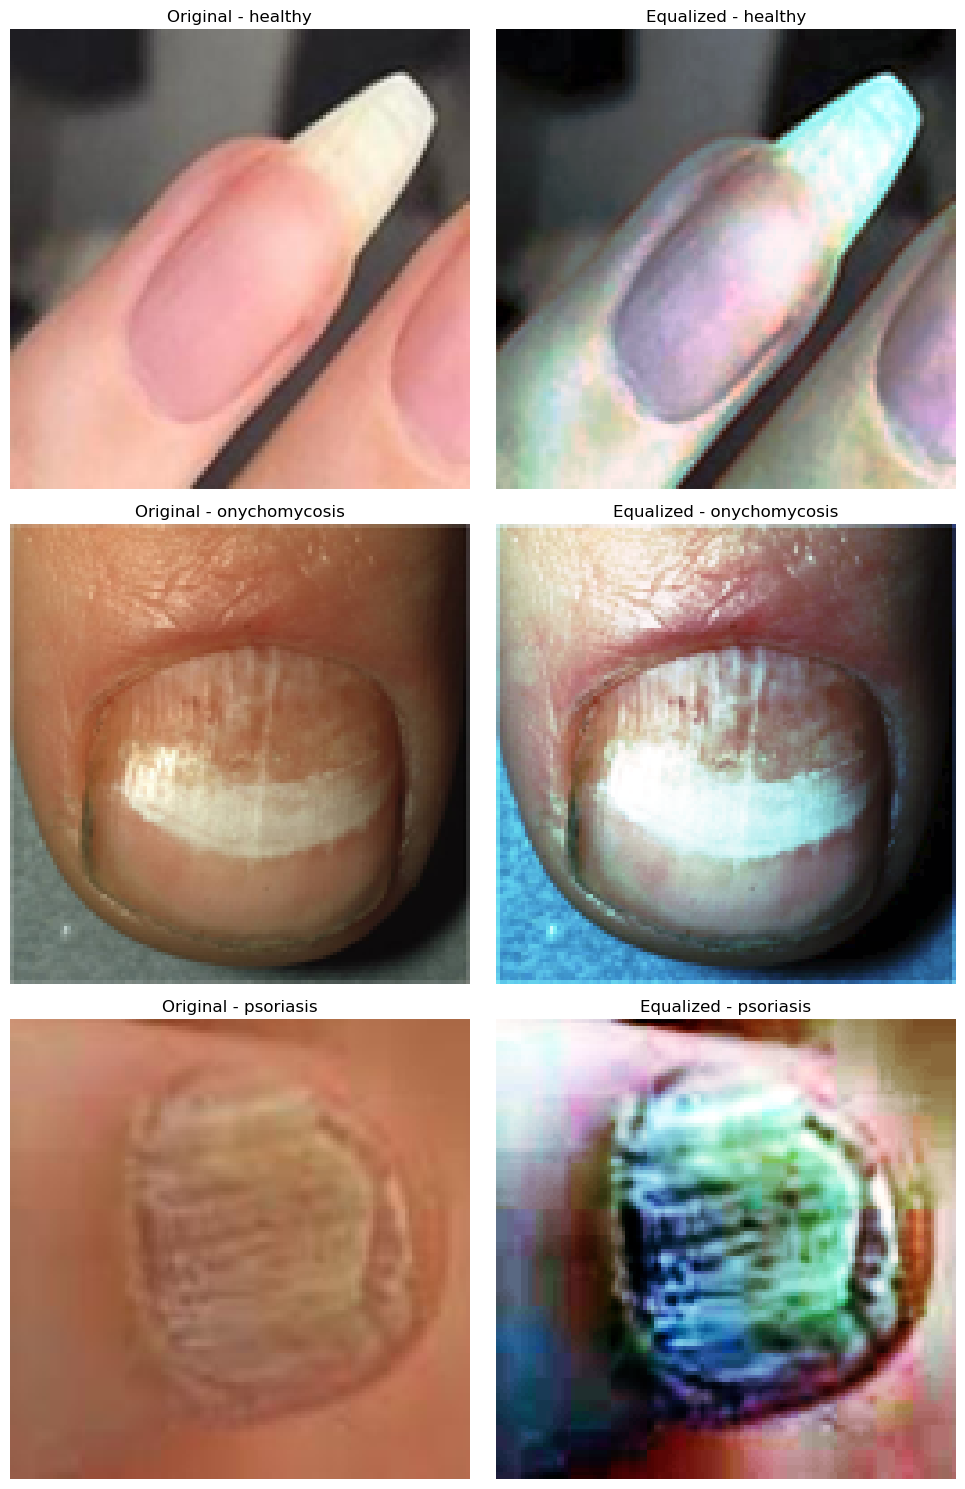

In [184]:
# histogram

from PIL import Image, ImageOps
import numpy as np

def equalize_images_nasnet(image_array):
    equalized_images = []
    for img in image_array:
        pil_img = Image.fromarray((img * 255).astype(np.uint8))
        equalized_img = ImageOps.equalize(pil_img)
        equalized_images.append(np.array(equalized_img) / 255.0)
    return np.array(equalized_images)

filtered_train_images_nasnet = equalize_images_nasnet(normalized_train_images_nasnet)
filtered_test_images_nasnet = equalize_images(normalized_test_images_nasnet)

import matplotlib.pyplot as plt
import numpy as np

def plot_images_per_category(original_images, equalized_images, labels, class_names, num_images_per_class=1):
    fig, axes = plt.subplots(len(class_names), 2, figsize=(10, 15))
    
    for i, class_name in enumerate(class_names):
        class_indexes = np.where(labels == class_name)[0]
        for j in range(num_images_per_class):
            sample_index = class_indexes[j]  
            axes[i, 0].imshow(original_images[sample_index])
            axes[i, 0].set_title("Original - " + class_name)
            axes[i, 0].axis('off')
            
            axes[i, 1].imshow(equalized_images[sample_index])
            axes[i, 1].set_title("Equalized - " + class_name)
            axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_images_per_category(normalized_train_images_nasnet, filtered_train_images_nasnet, train_labels, class_names, num_images_per_class=1)




In [104]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_nasnet = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen_nasnet = ImageDataGenerator()

train_generator_nasnet = train_datagen_nasnet.flow(
    filtered_train_images_nasnet, 
    encoded_train_labels_nasnet, 
    batch_size=32
)

test_generator_nasnet = test_datagen_nasnet.flow(
    filtered_test_images_nasnet,  
    encoded_test_labels_nasnet, 
    batch_size=32,
    shuffle=False  
)


# NasNetMobile 

In [192]:
import numpy as np
import tensorflow as tf
import random
import os

seed_value = 9557

os.environ['PYTHONHASHSEED'] = str(seed_value)

random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

base_model_nasnet = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model_nasnet.layers:
    layer.trainable = False

#custom Layers
x_nasnet = base_model_nasnet.output
x_nasnet = GlobalAveragePooling2D()(x_nasnet)  
x_nasnet = Dense(512, activation='relu')(x_nasnet)  
x_nasnet = Dropout(0.5)(x_nasnet)  
predictions = Dense(3, activation='softmax')(x_nasnet) 


model_nasnet = Model(inputs=base_model_nasnet.input, outputs=predictions)

model_nasnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model_nasnet.summary()


Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_17 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_17[0][0]']            
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_846 (Activation  (None, 111, 111, 32)         0         ['stem_bn1[0][0]']     

                                                                     'separable_conv_2_bn_reductio
                                                                    n_right1_stem_1[0][0]']       
                                                                                                  
 separable_conv_1_reduction  (None, 56, 56, 11)           1920      ['separable_conv_1_pad_reducti
 _right2_stem_1 (SeparableC                                         on_right2_stem_1[0][0]']      
 onv2D)                                                                                           
                                                                                                  
 separable_conv_1_pad_reduc  (None, 115, 115, 32)         0         ['activation_853[0][0]']      
 tion_right3_stem_1 (ZeroPa                                                                       
 dding2D)                                                                                         
          

 separable_conv_2_bn_reduct  (None, 56, 56, 11)           44        ['separable_conv_2_reduction_l
 ion_left4_stem_1 (BatchNor                                         eft4_stem_1[0][0]']           
 malization)                                                                                      
                                                                                                  
 reduction_right5_stem_1 (M  (None, 56, 56, 11)           0         ['reduction_pad_1_stem_1[0][0]
 axPooling2D)                                                       ']                            
                                                                                                  
 zero_padding2d_28 (ZeroPad  (None, 112, 112, 32)         0         ['adjust_relu_1_stem_2[0][0]']
 ding2D)                                                                                          
                                                                                                  
 reduction

 separable_conv_1_bn_reduct  (None, 28, 28, 22)           88        ['separable_conv_1_reduction_l
 ion_left1_stem_2 (BatchNor                                         eft1_stem_2[0][0]']           
 malization)                                                                                      
                                                                                                  
 separable_conv_1_bn_reduct  (None, 28, 28, 22)           88        ['separable_conv_1_reduction_r
 ion_right1_stem_2 (BatchNo                                         ight1_stem_2[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 activation_859 (Activation  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
 )                                                                  n_left1_stem_2[0][0]']        
          

 _right2_stem_2 (SeparableC                                                                       
 onv2D)                                                                                           
                                                                                                  
 activation_865 (Activation  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
 )                                                                  n_right3_stem_2[0][0]']       
                                                                                                  
 activation_867 (Activation  (None, 28, 28, 22)           0         ['separable_conv_1_bn_reductio
 )                                                                  n_left4_stem_2[0][0]']        
                                                                                                  
 reduction_left2_stem_2 (Ma  (None, 28, 28, 22)           0         ['reduction_pad_1_stem_2[0][0]
 xPooling2

                                                                                                  
 adjust_conv_2_0 (Conv2D)    (None, 28, 28, 22)           968       ['adjust_avg_pool_2_0[0][0]'] 
                                                                                                  
 activation_868 (Activation  (None, 28, 28, 88)           0         ['reduction_concat_stem_2[0][0
 )                                                                  ]']                           
                                                                                                  
 concatenate_19 (Concatenat  (None, 28, 28, 44)           0         ['adjust_conv_1_0[0][0]',     
 e)                                                                  'adjust_conv_2_0[0][0]']     
                                                                                                  
 normal_conv_1_0 (Conv2D)    (None, 28, 28, 44)           3872      ['activation_868[0][0]']      
          

 ft1_0 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_normal_ri  (None, 28, 28, 44)           2332      ['activation_872[0][0]']      
 ght1_0 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_2_normal_le  (None, 28, 28, 44)           3036      ['activation_874[0][0]']      
 ft2_0 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_normal_ri  (None, 28, 28, 44)           2332      ['activation_876[0][0]']      
 ght2_0 (SeparableConv2D)                                                                         
          

                                                                                                  
 normal_bn_1_1 (BatchNormal  (None, 28, 28, 44)           176       ['normal_conv_1_1[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_881 (Activation  (None, 28, 28, 44)           0         ['normal_bn_1_1[0][0]']       
 )                                                                                                
                                                                                                  
 activation_883 (Activation  (None, 28, 28, 44)           0         ['adjust_bn_1[0][0]']         
 )                                                                                                
                                                                                                  
 activatio

                                                                                                  
 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_left
 _left1_1 (BatchNormalizati                                         1_1[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_righ
 _right1_1 (BatchNormalizat                                         t1_1[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_left
 _left2_1 

 activation_899 (Activation  (None, 28, 28, 44)           0         ['adjust_bn_2[0][0]']         
 )                                                                                                
                                                                                                  
 activation_901 (Activation  (None, 28, 28, 44)           0         ['normal_bn_1_2[0][0]']       
 )                                                                                                
                                                                                                  
 separable_conv_1_normal_le  (None, 28, 28, 44)           3036      ['activation_893[0][0]']      
 ft1_2 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_1_normal_ri  (None, 28, 28, 44)           2332      ['activation_895[0][0]']      
 ght1_2 (S

 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_righ
 _right2_2 (BatchNormalizat                                         t2_2[0][0]']                  
 ion)                                                                                             
                                                                                                  
 normal_left3_2 (AveragePoo  (None, 28, 28, 44)           0         ['normal_bn_1_2[0][0]']       
 ling2D)                                                                                          
                                                                                                  
 normal_left4_2 (AveragePoo  (None, 28, 28, 44)           0         ['adjust_bn_2[0][0]']         
 ling2D)                                                                                          
                                                                                                  
 normal_ri

 ft2_3 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_1_normal_ri  (None, 28, 28, 44)           2332      ['activation_911[0][0]']      
 ght2_3 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_1_normal_le  (None, 28, 28, 44)           2332      ['activation_913[0][0]']      
 ft5_3 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_1_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_1_normal_left
 _left1_3 (BatchNormalizati                                         1_3[0][0]']                   
 on)      

 separable_conv_2_bn_normal  (None, 28, 28, 44)           176       ['separable_conv_2_normal_left
 _left5_3 (BatchNormalizati                                         5_3[0][0]']                   
 on)                                                                                              
                                                                                                  
 normal_add_1_3 (Add)        (None, 28, 28, 44)           0         ['separable_conv_2_bn_normal_l
                                                                    eft1_3[0][0]',                
                                                                     'separable_conv_2_bn_normal_r
                                                                    ight1_3[0][0]']               
                                                                                                  
 normal_add_2_3 (Add)        (None, 28, 28, 44)           0         ['separable_conv_2_bn_normal_l
          

 )                                                                  n_right1_reduce_4[0][0]']     
                                                                                                  
 separable_conv_2_reduction  (None, 14, 14, 88)           9944      ['activation_918[0][0]']      
 _left1_reduce_4 (Separable                                                                       
 Conv2D)                                                                                          
                                                                                                  
 separable_conv_2_reduction  (None, 14, 14, 88)           12056     ['activation_920[0][0]']      
 _right1_reduce_4 (Separabl                                                                       
 eConv2D)                                                                                         
                                                                                                  
 activatio

 separable_conv_2_bn_reduct  (None, 14, 14, 88)           352       ['separable_conv_2_reduction_r
 ion_right2_reduce_4 (Batch                                         ight2_reduce_4[0][0]']        
 Normalization)                                                                                   
                                                                                                  
 separable_conv_2_reduction  (None, 14, 14, 88)           9944      ['activation_924[0][0]']      
 _right3_reduce_4 (Separabl                                                                       
 eConv2D)                                                                                         
                                                                                                  
 separable_conv_2_reduction  (None, 14, 14, 88)           8536      ['activation_926[0][0]']      
 _left4_reduce_4 (Separable                                                                       
 Conv2D)  

 adjust_bn_5 (BatchNormaliz  (None, 14, 14, 88)           352       ['concatenate_20[0][0]']      
 ation)                                                                                           
                                                                                                  
 normal_bn_1_5 (BatchNormal  (None, 14, 14, 88)           352       ['normal_conv_1_5[0][0]']     
 ization)                                                                                         
                                                                                                  
 activation_928 (Activation  (None, 14, 14, 88)           0         ['normal_bn_1_5[0][0]']       
 )                                                                                                
                                                                                                  
 activation_930 (Activation  (None, 14, 14, 88)           0         ['adjust_bn_5[0][0]']         
 )        

 separable_conv_2_normal_le  (None, 14, 14, 88)           8536      ['activation_937[0][0]']      
 ft5_5 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_2_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_2_normal_left
 _left1_5 (BatchNormalizati                                         1_5[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_2_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_2_normal_righ
 _right1_5 (BatchNormalizat                                         t1_5[0][0]']                  
 ion)                                                                                             
          

 )                                                                                                
                                                                                                  
 activation_946 (Activation  (None, 14, 14, 88)           0         ['adjust_bn_6[0][0]']         
 )                                                                                                
                                                                                                  
 activation_948 (Activation  (None, 14, 14, 88)           0         ['normal_bn_1_6[0][0]']       
 )                                                                                                
                                                                                                  
 separable_conv_1_normal_le  (None, 14, 14, 88)           9944      ['activation_940[0][0]']      
 ft1_6 (SeparableConv2D)                                                                          
          

 on)                                                                                              
                                                                                                  
 separable_conv_2_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_2_normal_righ
 _right2_6 (BatchNormalizat                                         t2_6[0][0]']                  
 ion)                                                                                             
                                                                                                  
 normal_left3_6 (AveragePoo  (None, 14, 14, 88)           0         ['normal_bn_1_6[0][0]']       
 ling2D)                                                                                          
                                                                                                  
 normal_left4_6 (AveragePoo  (None, 14, 14, 88)           0         ['adjust_bn_6[0][0]']         
 ling2D)  

                                                                                                  
 separable_conv_1_normal_le  (None, 14, 14, 88)           9944      ['activation_956[0][0]']      
 ft2_7 (SeparableConv2D)                                                                          
                                                                                                  
 separable_conv_1_normal_ri  (None, 14, 14, 88)           8536      ['activation_958[0][0]']      
 ght2_7 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_1_normal_le  (None, 14, 14, 88)           8536      ['activation_960[0][0]']      
 ft5_7 (SeparableConv2D)                                                                          
                                                                                                  
 separable

 oling2D)                                                                                         
                                                                                                  
 separable_conv_2_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_2_normal_left
 _left5_7 (BatchNormalizati                                         5_7[0][0]']                   
 on)                                                                                              
                                                                                                  
 normal_add_1_7 (Add)        (None, 14, 14, 88)           0         ['separable_conv_2_bn_normal_l
                                                                    eft1_7[0][0]',                
                                                                     'separable_conv_2_bn_normal_r
                                                                    ight1_7[0][0]']               
          

                                                                                                  
 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_righ
 _right1_8 (BatchNormalizat                                         t1_8[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_left
 _left2_8 (BatchNormalizati                                         2_8[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_1_bn_normal  (None, 14, 14, 88)           352       ['separable_conv_1_normal_righ
 _right2_8

                                                                     'separable_conv_2_bn_normal_r
                                                                    ight2_8[0][0]']               
                                                                                                  
 normal_add_3_8 (Add)        (None, 14, 14, 88)           0         ['normal_left3_8[0][0]',      
                                                                     'adjust_bn_8[0][0]']         
                                                                                                  
 normal_add_4_8 (Add)        (None, 14, 14, 88)           0         ['normal_left4_8[0][0]',      
                                                                     'normal_right4_8[0][0]']     
                                                                                                  
 normal_add_5_8 (Add)        (None, 14, 14, 88)           0         ['separable_conv_2_bn_normal_l
          

 )                                                                                                
                                                                                                  
 separable_conv_2_bn_reduct  (None, 7, 7, 176)            704       ['separable_conv_2_reduction_l
 ion_left1_reduce_8 (BatchN                                         eft1_reduce_8[0][0]']         
 ormalization)                                                                                    
                                                                                                  
 separable_conv_2_bn_reduct  (None, 7, 7, 176)            704       ['separable_conv_2_reduction_r
 ion_right1_reduce_8 (Batch                                         ight1_reduce_8[0][0]']        
 Normalization)                                                                                   
                                                                                                  
 separable

                                                                                                  
 adjust_relu_1_9 (Activatio  (None, 14, 14, 528)          0         ['normal_concat_8[0][0]']     
 n)                                                                                               
                                                                                                  
 reduction_add_2_reduce_8 (  (None, 7, 7, 176)            0         ['reduction_left2_reduce_8[0][
 Add)                                                               0]',                          
                                                                     'separable_conv_2_bn_reductio
                                                                    n_right2_reduce_8[0][0]']     
                                                                                                  
 reduction_left3_reduce_8 (  (None, 7, 7, 176)            0         ['reduction_pad_1_reduce_8[0][
 AveragePo

                                                                                                  
 activation_991 (Activation  (None, 7, 7, 176)            0         ['adjust_bn_9[0][0]']         
 )                                                                                                
                                                                                                  
 activation_993 (Activation  (None, 7, 7, 176)            0         ['adjust_bn_9[0][0]']         
 )                                                                                                
                                                                                                  
 activation_995 (Activation  (None, 7, 7, 176)            0         ['normal_bn_1_9[0][0]']       
 )                                                                                                
                                                                                                  
 separable

 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_left
 _left2_9 (BatchNormalizati                                         2_9[0][0]']                   
 on)                                                                                              
                                                                                                  
 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_righ
 _right2_9 (BatchNormalizat                                         t2_9[0][0]']                  
 ion)                                                                                             
                                                                                                  
 normal_left3_9 (AveragePoo  (None, 7, 7, 176)            0         ['normal_bn_1_9[0][0]']       
 ling2D)                                                                                          
          

 separable_conv_1_normal_ri  (None, 7, 7, 176)            32560     ['activation_1001[0][0]']     
 ght1_10 (SeparableConv2D)                                                                        
                                                                                                  
 separable_conv_1_normal_le  (None, 7, 7, 176)            35376     ['activation_1003[0][0]']     
 ft2_10 (SeparableConv2D)                                                                         
                                                                                                  
 separable_conv_1_normal_ri  (None, 7, 7, 176)            32560     ['activation_1005[0][0]']     
 ght2_10 (SeparableConv2D)                                                                        
                                                                                                  
 separable_conv_1_normal_le  (None, 7, 7, 176)            32560     ['activation_1007[0][0]']     
 ft5_10 (S

                                                                                                  
 normal_right4_10 (AverageP  (None, 7, 7, 176)            0         ['adjust_bn_10[0][0]']        
 ooling2D)                                                                                        
                                                                                                  
 separable_conv_2_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_2_normal_left
 _left5_10 (BatchNormalizat                                         5_10[0][0]']                  
 ion)                                                                                             
                                                                                                  
 normal_add_1_10 (Add)       (None, 7, 7, 176)            0         ['separable_conv_2_bn_normal_l
                                                                    eft1_10[0][0]',               
          

 _left1_11 (BatchNormalizat                                         1_11[0][0]']                  
 ion)                                                                                             
                                                                                                  
 separable_conv_1_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_1_normal_righ
 _right1_11 (BatchNormaliza                                         t1_11[0][0]']                 
 tion)                                                                                            
                                                                                                  
 separable_conv_1_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_1_normal_left
 _left2_11 (BatchNormalizat                                         2_11[0][0]']                  
 ion)                                                                                             
          

 normal_add_2_11 (Add)       (None, 7, 7, 176)            0         ['separable_conv_2_bn_normal_l
                                                                    eft2_11[0][0]',               
                                                                     'separable_conv_2_bn_normal_r
                                                                    ight2_11[0][0]']              
                                                                                                  
 normal_add_3_11 (Add)       (None, 7, 7, 176)            0         ['normal_left3_11[0][0]',     
                                                                     'adjust_bn_11[0][0]']        
                                                                                                  
 normal_add_4_11 (Add)       (None, 7, 7, 176)            0         ['normal_left4_11[0][0]',     
                                                                     'normal_right4_11[0][0]']    
          

 tion)                                                                                            
                                                                                                  
 separable_conv_1_bn_normal  (None, 7, 7, 176)            704       ['separable_conv_1_normal_left
 _left5_12 (BatchNormalizat                                         5_12[0][0]']                  
 ion)                                                                                             
                                                                                                  
 activation_1024 (Activatio  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_l
 n)                                                                 eft1_12[0][0]']               
                                                                                                  
 activation_1026 (Activatio  (None, 7, 7, 176)            0         ['separable_conv_1_bn_normal_r
 n)       

                                                                     'normal_bn_1_12[0][0]']      
                                                                                                  
 normal_concat_12 (Concaten  (None, 7, 7, 1056)           0         ['adjust_bn_12[0][0]',        
 ate)                                                                'normal_add_1_12[0][0]',     
                                                                     'normal_add_2_12[0][0]',     
                                                                     'normal_add_3_12[0][0]',     
                                                                     'normal_add_4_12[0][0]',     
                                                                     'normal_add_5_12[0][0]']     
                                                                                                  
 activation_1033 (Activatio  (None, 7, 7, 1056)           0         ['normal_concat_12[0][0]']    
 n)       

In [193]:
nasnet1 = model_nasnet.fit(
    train_generator_nasnet,
    steps_per_epoch=len(filtered_train_images_nasnet) // 32,  
    epochs=10,  
    validation_data=test_generator_nasnet,
    validation_steps=len(filtered_test_images_nasnet) // 32  
)


Epoch 1/10
36/36 [==============================] - 21s 324ms/step - loss: 0.9018 - accuracy: 0.6231 - val_loss: 0.6644 - val_accuracy: 0.7604
Epoch 2/10
36/36 [==============================] - 8s 220ms/step - loss: 0.5932 - accuracy: 0.7493 - val_loss: 0.6691 - val_accuracy: 0.7361
Epoch 3/10
36/36 [==============================] - 7s 200ms/step - loss: 0.5069 - accuracy: 0.7802 - val_loss: 0.6699 - val_accuracy: 0.7222
Epoch 4/10
36/36 [==============================] - 7s 204ms/step - loss: 0.4878 - accuracy: 0.7908 - val_loss: 0.6139 - val_accuracy: 0.7604
Epoch 5/10
36/36 [==============================] - 7s 201ms/step - loss: 0.4757 - accuracy: 0.7873 - val_loss: 0.6380 - val_accuracy: 0.7361
Epoch 6/10
36/36 [==============================] - 8s 227ms/step - loss: 0.4163 - accuracy: 0.8173 - val_loss: 0.6109 - val_accuracy: 0.7361
Epoch 7/10
36/36 [==============================] - 8s 217ms/step - loss: 0.4252 - accuracy: 0.8226 - val_loss: 0.6721 - val_accuracy: 0.7361
Epoch

In [194]:
test_loss_nasnet, test_accuracy_nasnet = model_nasnet.evaluate(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
print("Test Loss for Nasnet Mobile:", test_loss_nasnet)
print("Test Accuracy for Nasnet Mobile:", test_accuracy_nasnet)

test_predictions_nasnet = model_nasnet.predict(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
test_predictions_nasnet = np.argmax(test_predictions_nasnet, axis=1)  


test_generator_nasnet = test_datagen_nasnet.flow(
    filtered_test_images_nasnet, 
    encoded_test_labels_nasnet, 
    batch_size=32,
    shuffle=False  
)
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_nasnet = confusion_matrix(encoded_test_labels_nasnet[:len(test_predictions_nasnet)], test_predictions_nasnet)
print("Confusion Matrix for Nasnet Mobile:")
print(conf_matrix_nasnet)

class_report_nasnet = classification_report(encoded_test_labels_nasnet[:len(test_predictions_nasnet)], test_predictions_nasnet, target_names=le.classes_)
print("Classification Report for Nasnet Mobile:")
print(class_report_nasnet)


9/9 [==============================] - 3s 277ms/step - loss: 0.6720 - accuracy: 0.7257
Test Loss for Nasnet Mobile: 0.6720044016838074
Test Accuracy for Nasnet Mobile: 0.7256944179534912
9/9 [==============================] - 6s 265ms/step
Confusion Matrix for Nasnet Mobile:
[[ 39  12  11]
 [  6 124  17]
 [  3  30  46]]
Classification Report for Nasnet Mobile:
               precision    recall  f1-score   support

      healthy       0.81      0.63      0.71        62
onychomycosis       0.75      0.84      0.79       147
    psoriasis       0.62      0.58      0.60        79

     accuracy                           0.73       288
    macro avg       0.73      0.68      0.70       288
 weighted avg       0.73      0.73      0.72       288



In [195]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_nasnet = recall_score(encoded_test_labels_nasnet[:len(test_predictions_nasnet)], test_predictions_nasnet, average='macro')


total_nasnet = np.sum(conf_matrix_nasnet)  
specificity_per_class_nasnet = []
for i in range(conf_matrix_nasnet.shape[0]):
    tn = total_nasnet - (np.sum(conf_matrix_nasnet[i, :]) + np.sum(conf_matrix_nasnet[:, i]) - conf_matrix_nasnet[i, i])
    fp = np.sum(conf_matrix_nasnet[:, i]) - conf_matrix_nasnet[i, i]
    specificity_per_class_nasnet.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_nasnet = np.mean(specificity_per_class_nasnet)


kappa_nasnet = cohen_kappa_score(encoded_test_labels_nasnet[:len(test_predictions_nasnet)], test_predictions_nasnet)

print("Sensitivity (Recall) for Nasnet Mobile:", sensitivity_nasnet)
print("Specificity for Nasnet Mobile:", specificity_nasnet)
print("Cohen's Kappa for Nasnet Mobile:", kappa_nasnet)


Sensitivity (Recall) for Nasnet Mobile: 0.6849493846810536
Specificity for Nasnet Mobile: 0.8427777862862941
Cohen's Kappa for Nasnet Mobile: 0.5423974255832662


# fine tuning nasnet with weights

In [196]:

train_label_counts_nasnet = Counter(train_labels)

print("Training label counts:", train_label_counts_nasnet)
print("Testing label counts:", Counter(test_labels))  

class_weights_nasnet = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(encoded_train_labels_nasnet),
    y=encoded_train_labels_nasnet
)
class_weight_dict_nasnet = {i: weight for i, weight in enumerate(class_weights_nasnet)}
print("Class weights:", class_weight_dict_nasnet)

Training label counts: Counter({'onychomycosis': 575, 'psoriasis': 342, 'healthy': 248})
Testing label counts: Counter({'onychomycosis': 147, 'psoriasis': 92, 'healthy': 62})
Class weights: {0: 1.5658602150537635, 1: 0.6753623188405797, 2: 1.135477582846004}


In [197]:

model_nasnet2 = Model(inputs=base_model_nasnet.input, outputs=predictions)

model_nasnet2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


nasnet2 = model_nasnet2.fit(
    train_generator_nasnet,
    steps_per_epoch=len(filtered_train_images_nasnet) // 32,
    epochs=10,
    validation_data=test_generator_nasnet,
    validation_steps=len(filtered_test_images_nasnet) // 32,
    class_weight=class_weight_dict_nasnet
)


Epoch 1/10
36/36 [==============================] - 19s 299ms/step - loss: 0.4569 - accuracy: 0.8032 - val_loss: 0.7151 - val_accuracy: 0.6806
Epoch 2/10
36/36 [==============================] - 8s 216ms/step - loss: 0.4250 - accuracy: 0.8147 - val_loss: 0.6686 - val_accuracy: 0.7118
Epoch 3/10
36/36 [==============================] - 8s 213ms/step - loss: 0.3969 - accuracy: 0.8164 - val_loss: 0.6523 - val_accuracy: 0.7604
Epoch 4/10
36/36 [==============================] - 8s 225ms/step - loss: 0.4232 - accuracy: 0.7935 - val_loss: 0.6470 - val_accuracy: 0.7604
Epoch 5/10
36/36 [==============================] - 8s 228ms/step - loss: 0.3883 - accuracy: 0.8279 - val_loss: 0.6808 - val_accuracy: 0.6840
Epoch 6/10
36/36 [==============================] - 7s 205ms/step - loss: 0.3700 - accuracy: 0.8279 - val_loss: 0.5771 - val_accuracy: 0.7778
Epoch 7/10
36/36 [==============================] - 7s 201ms/step - loss: 0.3489 - accuracy: 0.8323 - val_loss: 0.7215 - val_accuracy: 0.7118
Epoch

In [198]:
test_loss_cw_nasnet, test_accuracy_cw_nasnet = model_nasnet2.evaluate(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
print("Test Loss with Class Weights for Nasnet Mobile:", test_loss_cw_nasnet)
print("Test Accuracy with Class Weights for Nasnet Mobile:", test_accuracy_cw_nasnet)

test_predictions_cw_nasnet = model_nasnet2.predict(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
test_predictions_cw_nasnet = np.argmax(test_predictions_cw_nasnet, axis=1)  

test_generator_cw_nasnet = test_datagen_nasnet.flow(
    filtered_test_images_nasnet,
    encoded_test_labels_nasnet,
    batch_size=32,
    shuffle=False  
)

conf_matrix_cw_nasnet = confusion_matrix(encoded_test_labels_nasnet[:len(test_predictions_cw_nasnet)], test_predictions_cw_nasnet)
print("Confusion Matrix with Class Weights for Nasnet Mobile:")
print(conf_matrix_cw_nasnet)

class_report_cw_nasnet = classification_report(encoded_test_labels_nasnet[:len(test_predictions_cw_nasnet)], test_predictions_cw_nasnet, target_names=le.classes_)
print("Classification Report with Class Weights for Nasnet Mobile:")
print(class_report_cw_nasnet)

9/9 [==============================] - 3s 282ms/step - loss: 0.6725 - accuracy: 0.7292
Test Loss with Class Weights for Nasnet Mobile: 0.6724748015403748
Test Accuracy with Class Weights for Nasnet Mobile: 0.7291666865348816
9/9 [==============================] - 5s 270ms/step
Confusion Matrix with Class Weights for Nasnet Mobile:
[[ 38   7  17]
 [  5 109  33]
 [  2  14  63]]
Classification Report with Class Weights for Nasnet Mobile:
               precision    recall  f1-score   support

      healthy       0.84      0.61      0.71        62
onychomycosis       0.84      0.74      0.79       147
    psoriasis       0.56      0.80      0.66        79

     accuracy                           0.73       288
    macro avg       0.75      0.72      0.72       288
 weighted avg       0.76      0.73      0.73       288



In [199]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_cw_nasnet = recall_score(encoded_test_labels_nasnet[:len(test_predictions_cw_nasnet)], test_predictions_cw_nasnet, average='macro')


total_cw_nasnet = np.sum(conf_matrix_cw_nasnet)  
specificity_per_class_cw_nasnet = []
for i in range(conf_matrix_cw_nasnet.shape[0]):
    tn = total_cw_nasnet - (np.sum(conf_matrix_cw_nasnet[i, :]) + np.sum(conf_matrix_cw_nasnet[:, i]) - conf_matrix_cw_nasnet[i, i])
    fp = np.sum(conf_matrix_cw_nasnet[:, i]) - conf_matrix_cw_nasnet[i, i]
    specificity_per_class_cw_nasnet.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_cw_nasnet = np.mean(specificity_per_class_cw_nasnet)


kappa_cw_nasnet = cohen_kappa_score(encoded_test_labels_nasnet[:len(test_predictions_cw_nasnet)], test_predictions_cw_nasnet)

print("Sensitivity (Recall) with Class Weights for Nasnet Mobile:", sensitivity_cw_nasnet)
print("Specificity with Class Weights for Nasnet Mobile:", specificity_cw_nasnet)
print("Cohen's Kappa with Class Weights for Nasnet Mobile:", kappa_cw_nasnet)


Sensitivity (Recall) with Class Weights for Nasnet Mobile: 0.7172893929587625
Specificity with Class Weights for Nasnet Mobile: 0.8602853095663449
Cohen's Kappa with Class Weights for Nasnet Mobile: 0.5689698179097031


# fine tuning nasnet by unfreezing

In [200]:

model_nasnet3 = Model(inputs=base_model_nasnet.input, outputs=predictions)

model_nasnet3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



#unfreeze the last 4 layers of the NASNetMobile model
for layer in base_model_nasnet.layers[-4:]:
    layer.trainable = True

from tensorflow.keras.optimizers import Adam

model_nasnet3.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

nasnet3 = model_nasnet3.fit(
    train_generator_nasnet,
    steps_per_epoch=len(filtered_train_images_nasnet) // 32,
    epochs=10,  
    validation_data=test_generator_nasnet,
    validation_steps=len(filtered_test_images_nasnet) // 32,
    class_weight=class_weight_dict_nasnet
)

Epoch 1/10
36/36 [==============================] - 19s 299ms/step - loss: 0.3270 - accuracy: 0.8597 - val_loss: 0.6570 - val_accuracy: 0.7222
Epoch 2/10
36/36 [==============================] - 8s 222ms/step - loss: 0.3308 - accuracy: 0.8676 - val_loss: 0.6478 - val_accuracy: 0.7326
Epoch 3/10
36/36 [==============================] - 8s 216ms/step - loss: 0.2948 - accuracy: 0.8738 - val_loss: 0.6393 - val_accuracy: 0.7361
Epoch 4/10
36/36 [==============================] - 8s 218ms/step - loss: 0.2793 - accuracy: 0.8994 - val_loss: 0.6326 - val_accuracy: 0.7326
Epoch 5/10
36/36 [==============================] - 8s 219ms/step - loss: 0.3020 - accuracy: 0.8782 - val_loss: 0.6293 - val_accuracy: 0.7361
Epoch 6/10
36/36 [==============================] - 8s 219ms/step - loss: 0.3039 - accuracy: 0.8808 - val_loss: 0.6290 - val_accuracy: 0.7431
Epoch 7/10
36/36 [==============================] - 8s 229ms/step - loss: 0.3066 - accuracy: 0.8756 - val_loss: 0.6305 - val_accuracy: 0.7465
Epoch

In [201]:
test_loss_ft_nasnet, test_accuracy_ft_nasnet = model_nasnet3.evaluate(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
print("Test Loss after Fine-Tuning with NASNet:", test_loss_ft_nasnet)
print("Test Accuracy after Fine-Tuning with NASNet:", test_accuracy_ft_nasnet)

test_predictions_ft_nasnet = model_nasnet3.predict(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
test_predictions_ft_nasnet = np.argmax(test_predictions_ft_nasnet, axis=1)

conf_matrix_ft_nasnet = confusion_matrix(encoded_test_labels_nasnet[:len(test_predictions_ft_nasnet)], test_predictions_ft_nasnet)
class_report_ft_nasnet = classification_report(encoded_test_labels_nasnet[:len(test_predictions_ft_nasnet)], test_predictions_ft_nasnet, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with NASNet:")
print(conf_matrix_ft_nasnet)
print("Classification Report after Fine-Tuning with NASNet:")
print(class_report_ft_nasnet)

9/9 [==============================] - 3s 278ms/step - loss: 0.6125 - accuracy: 0.7500
Test Loss after Fine-Tuning with NASNet: 0.6125128865242004
Test Accuracy after Fine-Tuning with NASNet: 0.75
9/9 [==============================] - 5s 265ms/step
Confusion Matrix after Fine-Tuning with NASNet:
[[ 41  14   7]
 [  6 131  10]
 [  5  30  44]]
Classification Report after Fine-Tuning with NASNet:
               precision    recall  f1-score   support

      healthy       0.79      0.66      0.72        62
onychomycosis       0.75      0.89      0.81       147
    psoriasis       0.72      0.56      0.63        79

     accuracy                           0.75       288
    macro avg       0.75      0.70      0.72       288
 weighted avg       0.75      0.75      0.74       288



In [202]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_ft_nasnet = recall_score(encoded_test_labels_nasnet[:len(test_predictions_ft_nasnet)], test_predictions_ft_nasnet, average='macro')


total_ft_nasnet = np.sum(conf_matrix_ft_nasnet)  
specificity_per_class_ft_nasnet = []
for i in range(conf_matrix_ft_nasnet.shape[0]):
    tn = total_ft_nasnet - (np.sum(conf_matrix_ft_nasnet[i, :]) + np.sum(conf_matrix_ft_nasnet[:, i]) - conf_matrix_ft_nasnet[i, i])
    fp = np.sum(conf_matrix_ft_nasnet[:, i]) - conf_matrix_ft_nasnet[i, i]
    specificity_per_class_ft_nasnet.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_ft_nasnet = np.mean(specificity_per_class_ft_nasnet)


kappa_ft_nasnet = cohen_kappa_score(encoded_test_labels_nasnet[:len(test_predictions_ft_nasnet)], test_predictions_ft_nasnet)

print("Sensitivity (Recall) after Fine-Tuning with NASNet:", sensitivity_ft_nasnet)
print("Specificity after Fine-Tuning with NASNet:", specificity_ft_nasnet)
print("Cohen's Kappa after Fine-Tuning with NASNet:", kappa_ft_nasnet)


Sensitivity (Recall) after Fine-Tuning with NASNet: 0.7031362701607117
Specificity after Fine-Tuning with NASNet: 0.8526436610403353
Cohen's Kappa after Fine-Tuning with NASNet: 0.5783308931185944


# fine tuning nasnet with learning rate

In [203]:
#densenet 201 with lr

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
model_nasnet4 = Model(inputs=base_model_nasnet.input, outputs=predictions)

model_nasnet4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


nasnet_reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

#unfreeze the last 4 layers of the DenseNet121 model
for layer in base_model_nasnet.layers[-4:]:
    layer.trainable = True

model_nasnet4.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])



nasnet4 = model_nasnet4.fit(
    train_generator_nasnet,
    steps_per_epoch=len(filtered_train_images_nasnet) // 32,
    epochs=10,
    validation_data=test_generator_nasnet,
    validation_steps=len(filtered_test_images_nasnet) // 32,
    class_weight=class_weight_dict_nasnet,
    callbacks=[nasnet_reduce_lr] 
)






Epoch 1/10
36/36 [==============================] - 25s 314ms/step - loss: 0.2641 - accuracy: 0.8720 - val_loss: 0.6280 - val_accuracy: 0.7361 - lr: 1.0000e-04
Epoch 2/10
36/36 [==============================] - 8s 226ms/step - loss: 0.2651 - accuracy: 0.8667 - val_loss: 0.6220 - val_accuracy: 0.7431 - lr: 1.0000e-04
Epoch 3/10
36/36 [==============================] - 8s 224ms/step - loss: 0.2341 - accuracy: 0.8941 - val_loss: 0.6245 - val_accuracy: 0.7396 - lr: 1.0000e-04
Epoch 4/10
36/36 [==============================] - 8s 219ms/step - loss: 0.2610 - accuracy: 0.8747 - val_loss: 0.6038 - val_accuracy: 0.7431 - lr: 1.0000e-04
Epoch 5/10
36/36 [==============================] - 8s 224ms/step - loss: 0.2679 - accuracy: 0.8791 - val_loss: 0.6112 - val_accuracy: 0.7396 - lr: 1.0000e-04
Epoch 6/10
36/36 [==============================] - 8s 229ms/step - loss: 0.2580 - accuracy: 0.8800 - val_loss: 0.6121 - val_accuracy: 0.7326 - lr: 1.0000e-04
Epoch 7/10
36/36 [===========================

In [204]:

nasnet_test_loss_ft_lr, nasnet_test_accuracy_ft_lr = model_nasnet4.evaluate(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
print("Test Loss after Fine-Tuning with Learning Rate Scheduling on Nasnet Mobile:", nasnet_test_loss_ft_lr)
print("Test Accuracy after Fine-Tuning with Learning Rate Scheduling on Nasnet Mobile:", nasnet_test_accuracy_ft_lr)

nasnet_test_predictions_ft_lr = model_nasnet4.predict(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
nasnet_test_predictions_ft_lr = np.argmax(nasnet_test_predictions_ft_lr, axis=1)

nasnet_conf_matrix_ft_lr = confusion_matrix(encoded_test_labels_nasnet[:len(nasnet_test_predictions_ft_lr)], nasnet_test_predictions_ft_lr)
nasnet_class_report_ft_lr = classification_report(encoded_test_labels_nasnet[:len(nasnet_test_predictions_ft_lr)], nasnet_test_predictions_ft_lr, target_names=le.classes_)
print("Confusion Matrix after Fine-Tuning with Learning Rate Scheduling on NasNet:")
print(nasnet_conf_matrix_ft_lr)
print("Classification Report after Fine-Tuning with Learning Rate Scheduling on Nasnet:")
print(nasnet_class_report_ft_lr)



9/9 [==============================] - 3s 281ms/step - loss: 0.6238 - accuracy: 0.7361
Test Loss after Fine-Tuning with Learning Rate Scheduling on Nasnet Mobile: 0.623790979385376
Test Accuracy after Fine-Tuning with Learning Rate Scheduling on Nasnet Mobile: 0.7361111044883728
9/9 [==============================] - 6s 279ms/step
Confusion Matrix after Fine-Tuning with Learning Rate Scheduling on NasNet:
[[ 39  13  10]
 [  6 125  16]
 [  3  28  48]]
Classification Report after Fine-Tuning with Learning Rate Scheduling on Nasnet:
               precision    recall  f1-score   support

      healthy       0.81      0.63      0.71        62
onychomycosis       0.75      0.85      0.80       147
    psoriasis       0.65      0.61      0.63        79

     accuracy                           0.74       288
    macro avg       0.74      0.70      0.71       288
 weighted avg       0.74      0.74      0.73       288



In [205]:
from sklearn.metrics import recall_score, cohen_kappa_score


sensitivity_ft_lr_nasnet = recall_score(encoded_test_labels_nasnet[:len(nasnet_test_predictions_ft_lr)], nasnet_test_predictions_ft_lr, average='macro')


total_ft_lr_nasnet = np.sum(nasnet_conf_matrix_ft_lr)  
specificity_per_class_ft_lr_nasnet = []
for i in range(nasnet_conf_matrix_ft_lr.shape[0]):
    tn = total_ft_lr_nasnet - (np.sum(nasnet_conf_matrix_ft_lr[i, :]) + np.sum(nasnet_conf_matrix_ft_lr[:, i]) - nasnet_conf_matrix_ft_lr[i, i])
    fp = np.sum(nasnet_conf_matrix_ft_lr[:, i]) - nasnet_conf_matrix_ft_lr[i, i]
    specificity_per_class_ft_lr_nasnet.append(tn / (tn + fp) if (tn + fp) != 0 else 0)
specificity_ft_lr_nasnet = np.mean(specificity_per_class_ft_lr_nasnet)


kappa_ft_lr_nasnet = cohen_kappa_score(encoded_test_labels_nasnet[:len(nasnet_test_predictions_ft_lr)], nasnet_test_predictions_ft_lr)

print("Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling on NASNet:", sensitivity_ft_lr_nasnet)
print("Specificity after Fine-Tuning with Learning Rate Scheduling on NASNet:", specificity_ft_lr_nasnet)
print("Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling on NASNet:", kappa_ft_lr_nasnet)


Sensitivity (Recall) after Fine-Tuning with Learning Rate Scheduling on NASNet: 0.6956557769425995
Specificity after Fine-Tuning with Learning Rate Scheduling on NASNet: 0.8483316451436242
Cohen's Kappa after Fine-Tuning with Learning Rate Scheduling on NASNet: 0.5597747385358005


# Ensemble Approach

# ensemble averaging

In [144]:
#taking predictions of the fine-tune models
probabilities_vgg = model_rmsprop.predict(test_generator, steps=len(filtered_test_images) // 32)
probabilities_densenet = densenet_model1.predict(test_generator, steps=len(filtered_test_images) // 32)
probabilities_mobilenet = model_mobilenet2.predict(test_generator, steps=len(filtered_test_images) // 32)
probabilities_nasnet = model_nasnet2.predict(test_generator_nasnet, steps=len(filtered_test_images_nasnet) // 32)
probabilities_custom = model1_scratch.predict(test_generator, steps=len(filtered_test_images) // 32)

#averaging the probabilities
average_probabilities = (probabilities_vgg + probabilities_densenet + probabilities_mobilenet + probabilities_nasnet + probabilities_custom) / 5
ensemble_predictions = np.argmax(average_probabilities, axis=1)

#calculating accuracy
ensemble_accuracy = np.mean(ensemble_predictions == encoded_test_labels[:ensemble_predictions.shape[0]])
print("Ensemble Accuracy (Averaging):", ensemble_accuracy)


9/9 [==============================] - 2s 145ms/step
Ensemble Accuracy (Averaging): 0.9409722222222222


In [213]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, cohen_kappa_score
print("Ensemble Accuracy (Averaging):", ensemble_accuracy)
conf_matrix_ensemble = confusion_matrix(encoded_test_labels[:ensemble_predictions.shape[0]], ensemble_predictions)
class_report_ensemble = classification_report(encoded_test_labels[:ensemble_predictions.shape[0]], ensemble_predictions, target_names=le.classes_)
print("Classification Report for Ensemble (Averaging):")
print(class_report_ensemble)
sensitivity_ensemble = recall_score(encoded_test_labels[:ensemble_predictions.shape[0]], ensemble_predictions, average='macro')

total = np.sum(conf_matrix_ensemble)  
specificity_per_class = []
for i in range(conf_matrix_ensemble.shape[0]):
    tn = total - (np.sum(conf_matrix_ensemble[i, :]) + np.sum(conf_matrix_ensemble[:, i]) - conf_matrix_ensemble[i, i])
    fp = np.sum(conf_matrix_ensemble[:, i]) - conf_matrix_ensemble[i, i]
    specificity_per_class.append(tn / (tn + fp))
specificity_ensemble = np.mean(specificity_per_class)

kappa_ensemble = cohen_kappa_score(encoded_test_labels[:ensemble_predictions.shape[0]], ensemble_predictions)

print("Sensitivity (Recall) for Ensemble:", sensitivity_ensemble)
print("Specificity for Ensemble:", specificity_ensemble)
print("Cohen's Kappa for Ensemble:", kappa_ensemble)


Ensemble Accuracy (Averaging): 0.9409722222222222
Classification Report for Ensemble (Averaging):
               precision    recall  f1-score   support

      healthy       1.00      0.95      0.98        62
onychomycosis       0.94      0.96      0.95       147
    psoriasis       0.90      0.90      0.90        79

     accuracy                           0.94       288
    macro avg       0.95      0.94      0.94       288
 weighted avg       0.94      0.94      0.94       288

Sensitivity (Recall) for Ensemble: 0.9365102513034613
Specificity for Ensemble: 0.9659642336014116
Cohen's Kappa for Ensemble: 0.9039905873124816


<Figure size 800x600 with 0 Axes>

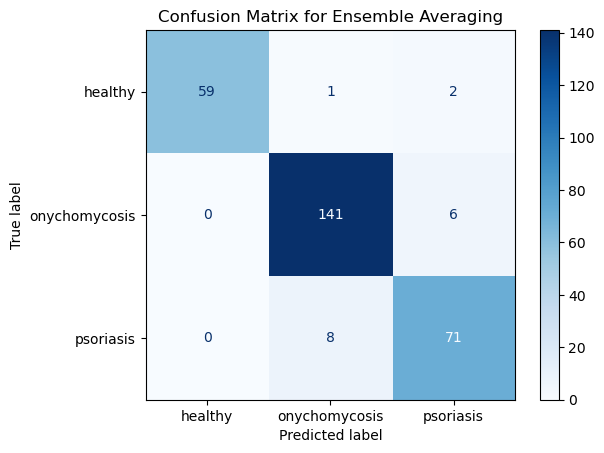

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

#confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(conf_matrix_ensemble, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix for Ensemble Averaging')
plt.show()


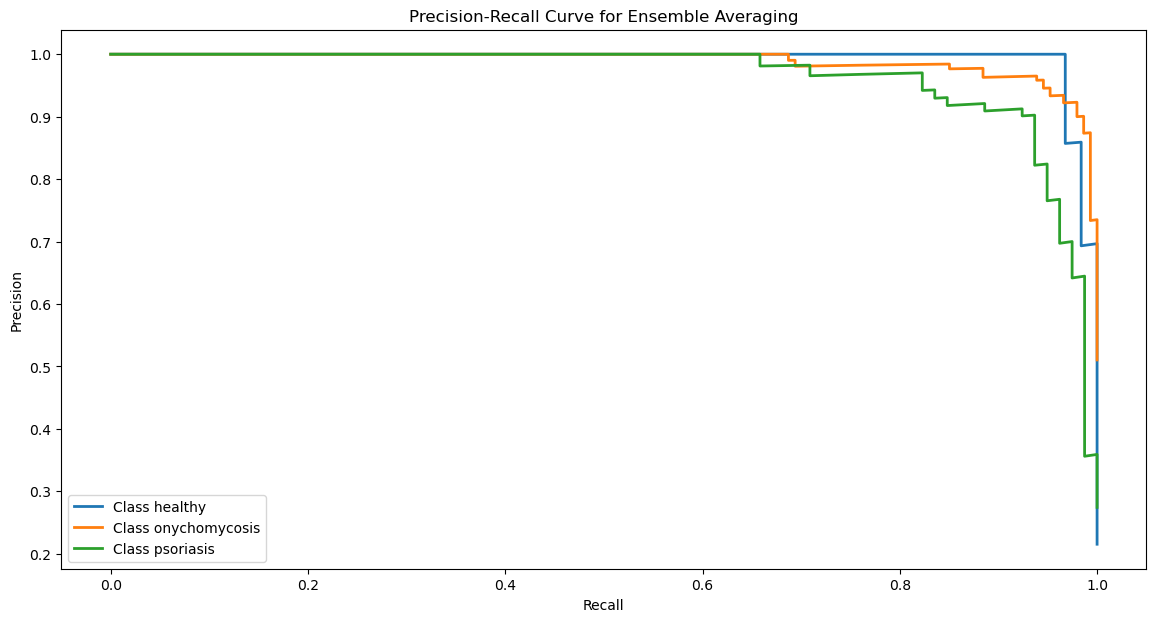

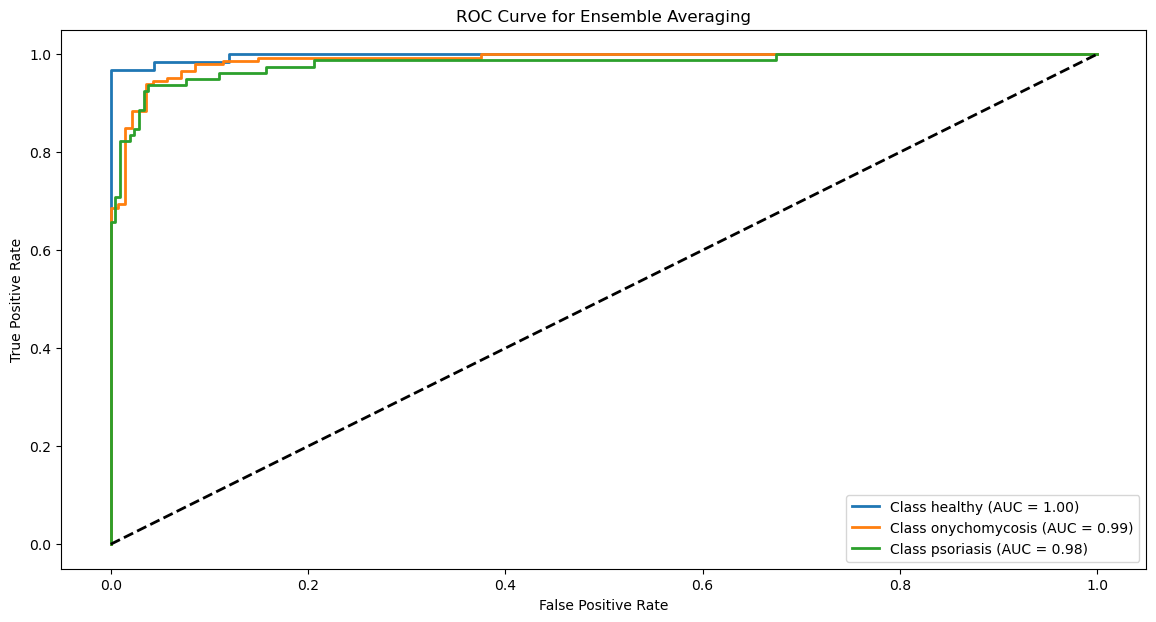

In [212]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_true_bin = label_binarize(encoded_test_labels[:ensemble_predictions.shape[0]], classes=range(len(le.classes_)))

#precision-Recall Curve
plt.figure(figsize=(14, 7))
for i in range(len(le.classes_)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], average_probabilities[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {le.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Ensemble Averaging')
plt.legend()
plt.show()

#ROC Curve
plt.figure(figsize=(14, 7))
for i in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], average_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {le.classes_[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble Averaging')
plt.legend()
plt.show()
